In [1]:
import numpy as np
import pandas as pd
import shap
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns

e:\Machine Learning and Data Science\SHAP-Projects\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set config

set_config(transform_output="pandas")

In [3]:
# load the data
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# shape of the data
df.shape

(10000, 14)

In [6]:
# check for missing values

df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check for duplicate rows

df.duplicated().sum()

np.int64(0)

In [8]:
# duplicate rows

(
    df
    .loc[
        df.duplicated(keep=False),:
    ]
)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## EDA

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
# drop the first three columns

columns_to_drop = df.columns[0:3]

columns_to_drop

Index(['RowNumber', 'CustomerId', 'Surname'], dtype='object')

In [11]:
# dro the columns

df = df.drop(columns=columns_to_drop)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
# lower case the column names

df.columns = df.columns.str.lower()

# df.rename(columns=str.lower)

In [14]:
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [15]:
# make our X and y

X = df.drop(columns=["exited"])
y = df['exited']

In [16]:
X

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: exited, Length: 10000, dtype: int64

In [18]:
# datatype

df.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [19]:
# list of columns

numerical_cols = ['creditscore','age','balance',"estimatedsalary"]

categorical_cols = ['geography','gender']

remainder_cols = [column_name for column_name in X.columns if column_name not in numerical_cols + categorical_cols]

In [20]:
numerical_cols

['creditscore', 'age', 'balance', 'estimatedsalary']

In [21]:
categorical_cols

['geography', 'gender']

In [22]:
remainder_cols

['tenure', 'numofproducts', 'hascrcard', 'isactivemember']

In [23]:
df[numerical_cols]

,creditscore,age,balance,estimatedsalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10
...,...,...,...,...
9995,771,39,0.00,96270.64
9996,516,35,57369.61,101699.77
9997,709,36,0.00,42085.58
9998,772,42,75075.31,92888.52


In [24]:
df[categorical_cols]

,geography,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [25]:
df[remainder_cols]

,tenure,numofproducts,hascrcard,isactivemember
0,2,1,1,1
1,1,1,0,1
2,8,3,1,0
3,1,2,0,0
4,2,1,1,1
...,...,...,...,...
9995,5,2,1,0
9996,10,1,1,1
9997,7,1,0,1
9998,3,2,1,0


In [26]:
from matplotlib.gridspec import GridSpec

In [27]:
def plots_for_numerical_columns(column_name,bins,kde = True):
    # set the figure size

    fig = plt.figure(figsize=(8,6))

    # grid spec
    grid = GridSpec(nrows=2,ncols=2,height_ratios=[0.6,0.4])

    # define th axes
    ax1 = plt.subplot(grid[0,:])

    ax2 = plt.subplot(grid[1,:])

    # plot the histogram

    sns.histplot(data=X,x=column_name,bins=bins,kde=kde,ax=ax1)

    # plot the boxplot

    sns.boxplot(data=df,x=column_name,ax=ax2)

    plt.show()

In [28]:
# bins for histogram

col_bins = {
    column_name: bin_val for column_name, bin_val in zip(numerical_cols,[50,15,"auto","auto"])
}

col_bins

{'creditscore': 50, 'age': 15, 'balance': 'auto', 'estimatedsalary': 'auto'}

Plots for column: creditscore




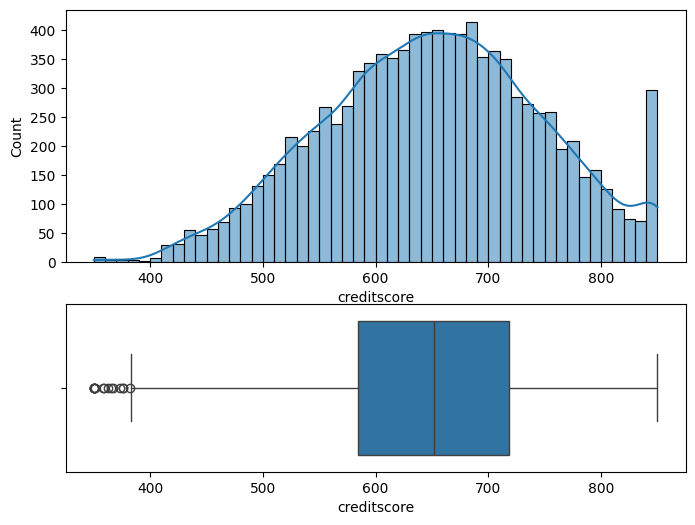





Plots for column: age




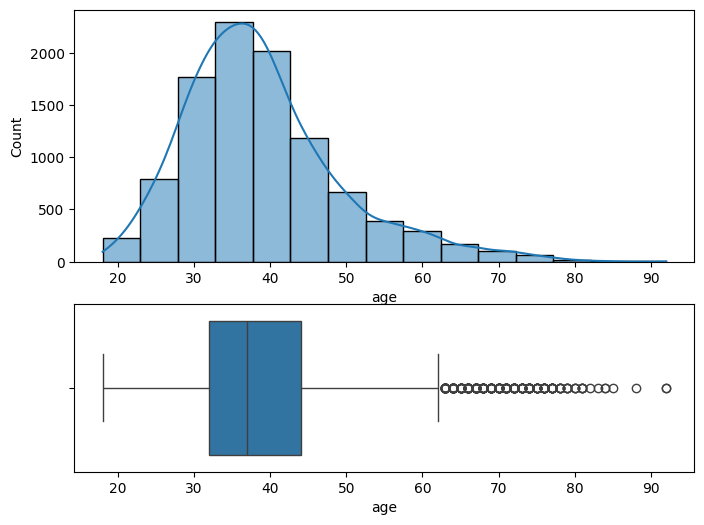





Plots for column: balance




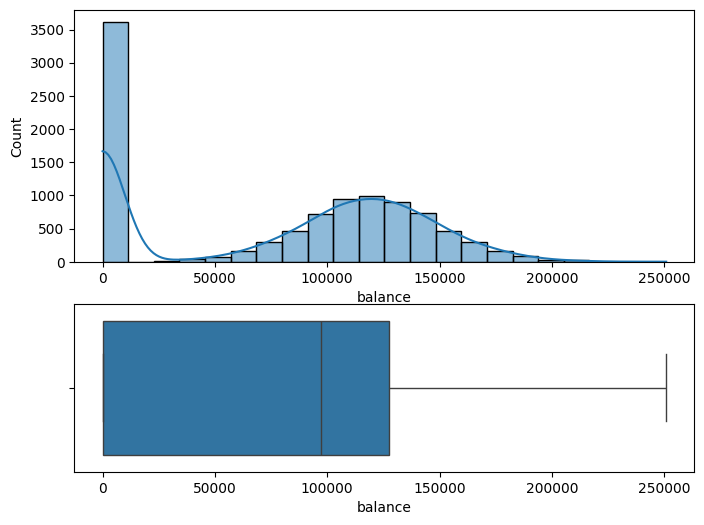





Plots for column: estimatedsalary




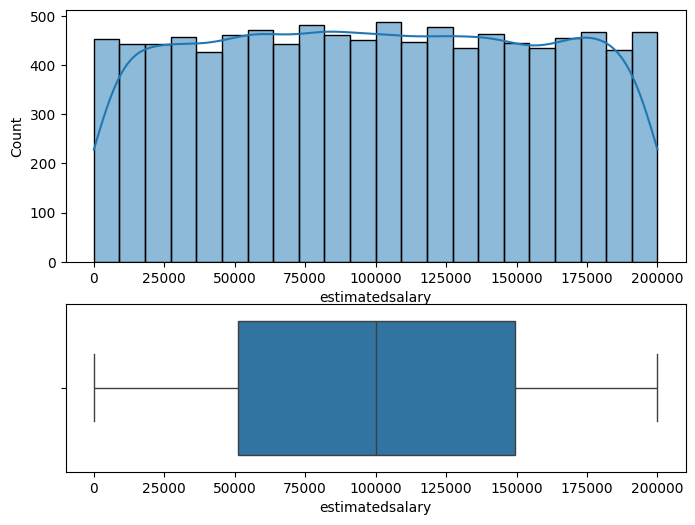

In [29]:
for numerical_col in numerical_cols:

    print(f"Plots for column: {numerical_col}",end="\n\n\n")

    plots_for_numerical_columns(numerical_col,bins=col_bins[numerical_col])

    print("\n\n\n")



In [30]:
# people with zero balance

(
    X.loc[
        (X['balance'].eq(0)),:
    ]
)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88
3,699,France,Female,39,1,0.0,2,0,0,93826.63
6,822,France,Male,50,7,0.0,2,1,1,10062.80
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01
12,476,France,Female,34,10,0.0,2,1,0,26260.98
...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40
9994,800,France,Female,29,2,0.0,2,0,0,167773.55
9995,771,France,Male,39,5,0.0,2,1,0,96270.64


In [31]:
# new columns for zero balance

X["iszerobal"] = X['balance'].eq(0).astype(int)

In [32]:
X

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,iszerobal
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0


In [33]:
def plot_for_categorical_column(column_name):

    display(X[column_name].value_counts(normalize=True))
    print(f"There are {X[column_name].nunique()} unique value in the column {column_name} are: {X[column_name].unique()}")

    # plot the count plot

    sns.countplot(data=X,x=column_name)

    plt.show()

Plots for categorical column: geography




geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

There are 3 unique value in the column geography are: ['France' 'Spain' 'Germany']


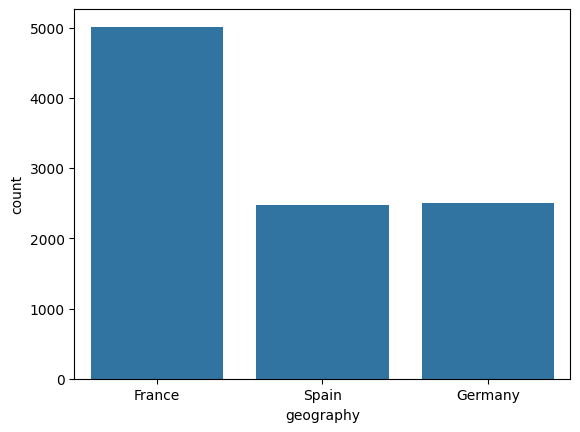





Plots for categorical column: gender




gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

There are 2 unique value in the column gender are: ['Female' 'Male']


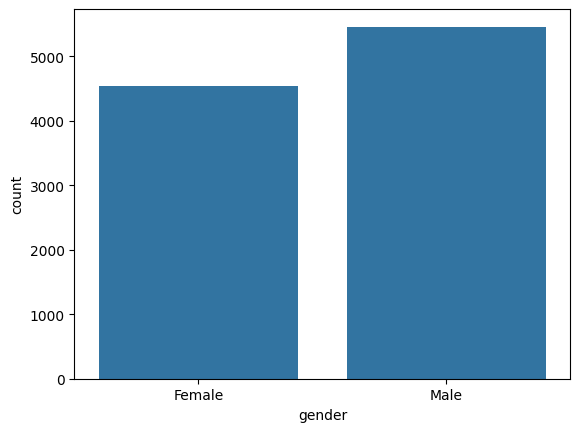

In [34]:
for cat_col in categorical_cols:
    print(f"Plots for categorical column: {cat_col}",end="\n\n\n")
    plot_for_categorical_column(cat_col)
    print("\n\n\n")

In [35]:
X

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,iszerobal
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0


In [36]:
# distribution of target variable

y.value_counts(normalize=True)

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## Feature Engineering and Model Training

In [37]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [38]:
# split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [39]:
X_train.shape

(8000, 11)

In [40]:
# make the column transformer

scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)

preprocessor = ColumnTransformer(transformers=[
    ("scaler",scaler,numerical_cols),
    ("encoder",encoder,categorical_cols)
],remainder="passthrough",verbose_feature_names_out=False)

In [41]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaler', ...), ('encoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_

In [42]:
# apply these transformations

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [43]:
X_train

,creditscore,age,balance,estimatedsalary,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,tenure,numofproducts,hascrcard,isactivemember,iszerobal
2151,0.806,0.527027,0.000000,0.797394,1.0,0.0,0.0,0.0,1.0,7,1,1,0,1
8392,0.778,0.189189,0.428413,0.319879,0.0,1.0,0.0,0.0,1.0,3,1,1,0,0
5006,0.810,0.256757,0.477648,0.586979,0.0,1.0,0.0,1.0,0.0,0,2,1,1,0
4117,0.422,0.256757,0.000000,0.415448,1.0,0.0,0.0,0.0,1.0,5,2,1,0,1
7182,0.684,0.418919,0.463700,0.537358,0.0,1.0,0.0,0.0,1.0,6,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.676,0.229730,0.000000,0.127396,0.0,0.0,1.0,1.0,0.0,6,1,1,0,1
4644,0.724,0.756757,0.000000,0.757144,0.0,0.0,1.0,0.0,1.0,5,2,0,0,1
8942,0.634,0.256757,0.301135,0.338648,1.0,0.0,0.0,1.0,0.0,9,2,1,1,0
2935,0.674,0.229730,0.423631,0.111189,0.0,0.0,1.0,0.0,1.0,8,2,1,0,0


## Model Building

In [44]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.ensemble import VotingClassifier

In [46]:
# define models

rf = RandomForestClassifier(class_weight="balanced")

xgb = XGBClassifier(class_weight="balanced")

lgbm = LGBMClassifier(class_weight="balanced")

In [47]:
# build voting classifier

model = VotingClassifier(estimators=[
    ('rf',rf),
    ('xgb',xgb),
    ('lgbm',lgbm),
],voting="soft",n_jobs=-1)

In [48]:
model

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('rf', ...), ('xgb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [49]:
# fit the model

model.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('rf', ...), ('xgb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [50]:
# get the predictions

y_pred = model.predict(X_test)

In [51]:
model.predict_proba(X_test.iloc[0:5,:])

array([[0.95846374, 0.04153625],
       [0.93825593, 0.06174408],
       [0.94483565, 0.05516436],
       [0.94688844, 0.05311157],
       [0.92152429, 0.07847571]])

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.54      0.60       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



### HP Tuning

In [53]:
import optuna
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [54]:
def objective(trial: optuna.Trial):


    params_dict ={
        'rf__n_estimators': trial.suggest_int('rf__n_estimators',50,200),
        'rf__max_depth' : trial.suggest_int('rf__max_depth',5,12),
        'rf__max_samples' : trial.suggest_float('rf__max_samples',0.5,1.0),

        "xgb__learning_rate": trial.suggest_float('xgb__learning_rate',0.01,0.5),
        "xgb__max_depth": trial.suggest_int('xgb__max_depth',3,10),
        'xgb__n_estimators': trial.suggest_int('xgb__n_estimators',30,200),
        'xgb__subsample': trial.suggest_float('xgb__subsample',0.5,1.0),
        'xgb__colsample_bynode' : trial.suggest_float('xgb__colsample_bynode',0.7,1.0),
        'xgb__reg_lambda': trial.suggest_float('xgb__reg_lambda',0.1,10.0),

        "lgbm__max_depth": trial.suggest_int('lgbm__max_depth',5,10),
        'lgbm__n_estimators': trial.suggest_int('lgbm__n_estimators',30,200),
        'lgbm__learning_rate': trial.suggest_float('lgbm__learning_rate',0.01,0.5),
        'lgbm__subsample': trial.suggest_float('lgbm__subsample',0.5,1.0),
        'lgbm__reg_lambda': trial.suggest_float('lgbm__reg_lambda',0.1,10.0)

    }


    # define models

    rf = RandomForestClassifier(class_weight="balanced")

    xgb = XGBClassifier(class_weight="balanced")

    lgbm = LGBMClassifier(class_weight="balanced")
    

    # build voting classifier

    model = VotingClassifier(estimators=[
        ('rf',rf),
        ('xgb',xgb),
        ('lgbm',lgbm),
    ],voting="soft",n_jobs=-1)

    # pass parameters

    model.set_params(**params_dict)
    
    # cross validation

    scores = cross_val_score(estimator=model,
                             X=X_train,
                             y=y_train,
                             cv=StratifiedKFold(n_splits=5,random_state=10,shuffle=True),
                             scoring='recall',n_jobs=-1)

    # mean recall score

    mean_recall = np.mean(scores)

    return mean_recall

In [55]:
# define my study

study = optuna.create_study(direction='maximize')

study.optimize(func=objective,n_trials=100,n_jobs=-1,show_progress_bar=True)

[I 2026-02-04 20:34:02,844] A new study created in memory with name: no-name-4edca7e4-e48c-48ff-af9c-de5de27b13d4
Best trial: 1. Best value: 0.588344:   1%|          | 1/100 [00:11<19:27, 11.79s/it]

[I 2026-02-04 20:34:14,639] Trial 1 finished with value: 0.5883435582822086 and parameters: {'rf__n_estimators': 91, 'rf__max_depth': 11, 'rf__max_samples': 0.5653183700815465, 'xgb__learning_rate': 0.17766915775385617, 'xgb__max_depth': 7, 'xgb__n_estimators': 87, 'xgb__subsample': 0.8291639981119541, 'xgb__colsample_bynode': 0.851329251329749, 'xgb__reg_lambda': 0.4413583651374027, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 49, 'lgbm__learning_rate': 0.0839523820696883, 'lgbm__subsample': 0.7564924087630247, 'lgbm__reg_lambda': 7.196040337091674}. Best is trial 1 with value: 0.5883435582822086.


Best trial: 1. Best value: 0.588344:   2%|▏         | 2/100 [00:15<11:25,  7.00s/it]

[I 2026-02-04 20:34:18,281] Trial 0 finished with value: 0.5852760736196319 and parameters: {'rf__n_estimators': 113, 'rf__max_depth': 12, 'rf__max_samples': 0.6853371101698539, 'xgb__learning_rate': 0.15629090082794075, 'xgb__max_depth': 7, 'xgb__n_estimators': 149, 'xgb__subsample': 0.776095894147828, 'xgb__colsample_bynode': 0.9477656633464353, 'xgb__reg_lambda': 7.130974003463126, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 53, 'lgbm__learning_rate': 0.13211885101386334, 'lgbm__subsample': 0.7865541446049035, 'lgbm__reg_lambda': 8.529685350404783}. Best is trial 1 with value: 0.5883435582822086.


Best trial: 2. Best value: 0.606135:   3%|▎         | 3/100 [00:18<08:41,  5.38s/it]

[I 2026-02-04 20:34:21,726] Trial 2 finished with value: 0.6061349693251534 and parameters: {'rf__n_estimators': 108, 'rf__max_depth': 5, 'rf__max_samples': 0.6716033136997336, 'xgb__learning_rate': 0.26886320488581367, 'xgb__max_depth': 6, 'xgb__n_estimators': 78, 'xgb__subsample': 0.9320118473890997, 'xgb__colsample_bynode': 0.7054095598309795, 'xgb__reg_lambda': 6.863430755058348, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 139, 'lgbm__learning_rate': 0.21976845208693102, 'lgbm__subsample': 0.9790500962370243, 'lgbm__reg_lambda': 6.293530116787418}. Best is trial 2 with value: 0.6061349693251534.


Best trial: 5. Best value: 0.633742:   4%|▍         | 4/100 [00:20<06:30,  4.07s/it]

[I 2026-02-04 20:34:23,789] Trial 5 finished with value: 0.6337423312883436 and parameters: {'rf__n_estimators': 73, 'rf__max_depth': 6, 'rf__max_samples': 0.5534921141607092, 'xgb__learning_rate': 0.14004689649480054, 'xgb__max_depth': 4, 'xgb__n_estimators': 86, 'xgb__subsample': 0.5178017677436704, 'xgb__colsample_bynode': 0.9695610277281317, 'xgb__reg_lambda': 2.6376943010121563, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 88, 'lgbm__learning_rate': 0.08440764123991931, 'lgbm__subsample': 0.5650142558716017, 'lgbm__reg_lambda': 3.059131311669723}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:   6%|▌         | 6/100 [00:24<03:59,  2.55s/it]

[I 2026-02-04 20:34:27,114] Trial 7 finished with value: 0.6036809815950921 and parameters: {'rf__n_estimators': 58, 'rf__max_depth': 9, 'rf__max_samples': 0.5874306496971319, 'xgb__learning_rate': 0.31762280260949677, 'xgb__max_depth': 5, 'xgb__n_estimators': 113, 'xgb__subsample': 0.6294778001860462, 'xgb__colsample_bynode': 0.7119750833897538, 'xgb__reg_lambda': 8.092536959238128, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 69, 'lgbm__learning_rate': 0.0974374078458854, 'lgbm__subsample': 0.933194573742266, 'lgbm__reg_lambda': 4.500770111831174}. Best is trial 5 with value: 0.6337423312883436.
[I 2026-02-04 20:34:27,226] Trial 4 finished with value: 0.5466257668711656 and parameters: {'rf__n_estimators': 74, 'rf__max_depth': 11, 'rf__max_samples': 0.7906856494042974, 'xgb__learning_rate': 0.23540663978463255, 'xgb__max_depth': 9, 'xgb__n_estimators': 123, 'xgb__subsample': 0.7193733882320033, 'xgb__colsample_bynode': 0.8290768153146104, 'xgb__reg_lambda': 8.384410300326815, 'lgbm__m

Best trial: 5. Best value: 0.633742:   7%|▋         | 7/100 [00:27<04:13,  2.73s/it]

[I 2026-02-04 20:34:30,337] Trial 3 finished with value: 0.5582822085889572 and parameters: {'rf__n_estimators': 183, 'rf__max_depth': 12, 'rf__max_samples': 0.5197072575506421, 'xgb__learning_rate': 0.3460034485319571, 'xgb__max_depth': 10, 'xgb__n_estimators': 66, 'xgb__subsample': 0.5462589140096876, 'xgb__colsample_bynode': 0.8525901653255322, 'xgb__reg_lambda': 5.930734460312175, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 112, 'lgbm__learning_rate': 0.3272734312740366, 'lgbm__subsample': 0.8614050610025723, 'lgbm__reg_lambda': 5.9306735448182994}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:   8%|▊         | 8/100 [00:28<03:14,  2.11s/it]

[I 2026-02-04 20:34:31,127] Trial 6 finished with value: 0.6177914110429448 and parameters: {'rf__n_estimators': 126, 'rf__max_depth': 9, 'rf__max_samples': 0.9001594449442165, 'xgb__learning_rate': 0.38001844259133327, 'xgb__max_depth': 4, 'xgb__n_estimators': 131, 'xgb__subsample': 0.6436809911838229, 'xgb__colsample_bynode': 0.7736399367462452, 'xgb__reg_lambda': 2.1498518407036933, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 92, 'lgbm__learning_rate': 0.10324353528302614, 'lgbm__subsample': 0.9577357837208554, 'lgbm__reg_lambda': 4.10209995907993}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:   9%|▉         | 9/100 [00:30<03:05,  2.04s/it]

[I 2026-02-04 20:34:33,016] Trial 8 finished with value: 0.5736196319018406 and parameters: {'rf__n_estimators': 163, 'rf__max_depth': 11, 'rf__max_samples': 0.95006786961943, 'xgb__learning_rate': 0.47958159133169054, 'xgb__max_depth': 10, 'xgb__n_estimators': 34, 'xgb__subsample': 0.6970162392943156, 'xgb__colsample_bynode': 0.8550270748223303, 'xgb__reg_lambda': 8.282255074396803, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 73, 'lgbm__learning_rate': 0.45111011424093533, 'lgbm__subsample': 0.6703314794967963, 'lgbm__reg_lambda': 8.867749524171137}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  10%|█         | 10/100 [00:35<04:43,  3.15s/it]

[I 2026-02-04 20:34:38,642] Trial 9 finished with value: 0.5773006134969326 and parameters: {'rf__n_estimators': 157, 'rf__max_depth': 6, 'rf__max_samples': 0.6977077652320995, 'xgb__learning_rate': 0.11281941487958613, 'xgb__max_depth': 5, 'xgb__n_estimators': 42, 'xgb__subsample': 0.663898440189665, 'xgb__colsample_bynode': 0.8386632377952499, 'xgb__reg_lambda': 1.7318151895631173, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 153, 'lgbm__learning_rate': 0.45234012369204984, 'lgbm__subsample': 0.5844246886981812, 'lgbm__reg_lambda': 8.700346159837995}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  11%|█         | 11/100 [00:36<03:43,  2.52s/it]

[I 2026-02-04 20:34:39,725] Trial 10 finished with value: 0.5846625766871166 and parameters: {'rf__n_estimators': 174, 'rf__max_depth': 8, 'rf__max_samples': 0.9096387516659201, 'xgb__learning_rate': 0.1667166623377307, 'xgb__max_depth': 10, 'xgb__n_estimators': 170, 'xgb__subsample': 0.9681413378259174, 'xgb__colsample_bynode': 0.9914992215961742, 'xgb__reg_lambda': 2.4771136245043186, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 132, 'lgbm__learning_rate': 0.17772197663257652, 'lgbm__subsample': 0.5878632092758025, 'lgbm__reg_lambda': 2.239534263524127}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  12%|█▏        | 12/100 [00:39<03:45,  2.56s/it]

[I 2026-02-04 20:34:42,383] Trial 11 finished with value: 0.5993865030674846 and parameters: {'rf__n_estimators': 63, 'rf__max_depth': 7, 'rf__max_samples': 0.7034999386833727, 'xgb__learning_rate': 0.46038664899708637, 'xgb__max_depth': 6, 'xgb__n_estimators': 74, 'xgb__subsample': 0.9537779506682611, 'xgb__colsample_bynode': 0.763688789106662, 'xgb__reg_lambda': 5.6659044384316335, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 110, 'lgbm__learning_rate': 0.23554488143123004, 'lgbm__subsample': 0.9775396168094916, 'lgbm__reg_lambda': 6.251702112517346}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  13%|█▎        | 13/100 [00:42<03:51,  2.66s/it]

[I 2026-02-04 20:34:45,284] Trial 12 finished with value: 0.6036809815950921 and parameters: {'rf__n_estimators': 50, 'rf__max_depth': 9, 'rf__max_samples': 0.5630805962222314, 'xgb__learning_rate': 0.0895392340346127, 'xgb__max_depth': 7, 'xgb__n_estimators': 150, 'xgb__subsample': 0.8503435084448181, 'xgb__colsample_bynode': 0.934086187162408, 'xgb__reg_lambda': 5.64296024466362, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 117, 'lgbm__learning_rate': 0.26596802861566854, 'lgbm__subsample': 0.6081926013061723, 'lgbm__reg_lambda': 6.74880784353827}. Best is trial 5 with value: 0.6337423312883436.
[I 2026-02-04 20:34:45,364] Trial 13 finished with value: 0.5883435582822086 and parameters: {'rf__n_estimators': 59, 'rf__max_depth': 12, 'rf__max_samples': 0.7702604818238421, 'xgb__learning_rate': 0.111084787257159, 'xgb__max_depth': 6, 'xgb__n_estimators': 67, 'xgb__subsample': 0.7466754656420077, 'xgb__colsample_bynode': 0.8159312932243571, 'xgb__reg_lambda': 4.445168540031823, 'lgbm__max

Best trial: 5. Best value: 0.633742:  15%|█▌        | 15/100 [00:48<03:54,  2.76s/it]

[I 2026-02-04 20:34:51,016] Trial 14 finished with value: 0.5803680981595092 and parameters: {'rf__n_estimators': 172, 'rf__max_depth': 10, 'rf__max_samples': 0.5640737684642683, 'xgb__learning_rate': 0.3746329048158418, 'xgb__max_depth': 6, 'xgb__n_estimators': 140, 'xgb__subsample': 0.6288130791856554, 'xgb__colsample_bynode': 0.8233827147937511, 'xgb__reg_lambda': 8.06807900697447, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 170, 'lgbm__learning_rate': 0.45312680003171657, 'lgbm__subsample': 0.7845339757698764, 'lgbm__reg_lambda': 8.864505387588482}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  16%|█▌        | 16/100 [00:48<03:04,  2.19s/it]

[I 2026-02-04 20:34:51,492] Trial 15 finished with value: 0.554601226993865 and parameters: {'rf__n_estimators': 90, 'rf__max_depth': 12, 'rf__max_samples': 0.6428995555081677, 'xgb__learning_rate': 0.27078227115123216, 'xgb__max_depth': 10, 'xgb__n_estimators': 136, 'xgb__subsample': 0.9713668859532995, 'xgb__colsample_bynode': 0.9197170415248974, 'xgb__reg_lambda': 0.10540257645174886, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 50, 'lgbm__learning_rate': 0.4815358962128585, 'lgbm__subsample': 0.6462525825927267, 'lgbm__reg_lambda': 7.4136388881963295}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  17%|█▋        | 17/100 [00:49<02:39,  1.92s/it]

[I 2026-02-04 20:34:52,633] Trial 16 finished with value: 0.5852760736196319 and parameters: {'rf__n_estimators': 112, 'rf__max_depth': 10, 'rf__max_samples': 0.5043829782247764, 'xgb__learning_rate': 0.191376362923467, 'xgb__max_depth': 10, 'xgb__n_estimators': 171, 'xgb__subsample': 0.6419107748306663, 'xgb__colsample_bynode': 0.731017699373986, 'xgb__reg_lambda': 8.191883637262855, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 81, 'lgbm__learning_rate': 0.32845523158486106, 'lgbm__subsample': 0.9487351673432722, 'lgbm__reg_lambda': 7.534944532216318}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  18%|█▊        | 18/100 [00:55<04:01,  2.94s/it]

[I 2026-02-04 20:34:58,326] Trial 17 finished with value: 0.6061349693251533 and parameters: {'rf__n_estimators': 54, 'rf__max_depth': 7, 'rf__max_samples': 0.8235602148503157, 'xgb__learning_rate': 0.026078831886984177, 'xgb__max_depth': 3, 'xgb__n_estimators': 161, 'xgb__subsample': 0.5234333680875332, 'xgb__colsample_bynode': 0.999635441464497, 'xgb__reg_lambda': 3.6863090222080688, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 199, 'lgbm__learning_rate': 0.010518890561322047, 'lgbm__subsample': 0.5194003126635848, 'lgbm__reg_lambda': 1.939222752356238}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  19%|█▉        | 19/100 [00:56<03:18,  2.45s/it]

[I 2026-02-04 20:34:59,523] Trial 18 finished with value: 0.607361963190184 and parameters: {'rf__n_estimators': 138, 'rf__max_depth': 8, 'rf__max_samples': 0.8462840947233254, 'xgb__learning_rate': 0.02727788933503958, 'xgb__max_depth': 3, 'xgb__n_estimators': 124, 'xgb__subsample': 0.5005332767181416, 'xgb__colsample_bynode': 0.9244499763749046, 'xgb__reg_lambda': 4.053422767272099, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 188, 'lgbm__learning_rate': 0.016968427174698764, 'lgbm__subsample': 0.5232287233702312, 'lgbm__reg_lambda': 3.477111747620771}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  20%|██        | 20/100 [00:59<03:27,  2.60s/it]

[I 2026-02-04 20:35:02,478] Trial 19 finished with value: 0.5999999999999999 and parameters: {'rf__n_estimators': 132, 'rf__max_depth': 9, 'rf__max_samples': 0.8479699513180398, 'xgb__learning_rate': 0.022760267878687637, 'xgb__max_depth': 3, 'xgb__n_estimators': 117, 'xgb__subsample': 0.5363231072569482, 'xgb__colsample_bynode': 0.9086907895414563, 'xgb__reg_lambda': 3.505579288050915, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 190, 'lgbm__learning_rate': 0.028552928757926803, 'lgbm__subsample': 0.5326659794387734, 'lgbm__reg_lambda': 3.600678643722304}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  21%|██        | 21/100 [01:01<03:05,  2.35s/it]

[I 2026-02-04 20:35:04,208] Trial 20 finished with value: 0.6153374233128834 and parameters: {'rf__n_estimators': 138, 'rf__max_depth': 8, 'rf__max_samples': 0.8574829722720112, 'xgb__learning_rate': 0.3820358857788908, 'xgb__max_depth': 3, 'xgb__n_estimators': 193, 'xgb__subsample': 0.5014909913543474, 'xgb__colsample_bynode': 0.7722256085804926, 'xgb__reg_lambda': 3.5622350771007474, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 84, 'lgbm__learning_rate': 0.03963323564098293, 'lgbm__subsample': 0.5010687354979412, 'lgbm__reg_lambda': 3.65650473624047}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  22%|██▏       | 22/100 [01:05<03:54,  3.00s/it]

[I 2026-02-04 20:35:08,798] Trial 21 finished with value: 0.5975460122699386 and parameters: {'rf__n_estimators': 139, 'rf__max_depth': 8, 'rf__max_samples': 0.8428344332931954, 'xgb__learning_rate': 0.014045534238768503, 'xgb__max_depth': 3, 'xgb__n_estimators': 110, 'xgb__subsample': 0.5018875552343541, 'xgb__colsample_bynode': 0.7719189881239599, 'xgb__reg_lambda': 3.5349380096048106, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 194, 'lgbm__learning_rate': 0.04834832613548262, 'lgbm__subsample': 0.5192588316501315, 'lgbm__reg_lambda': 4.107566500374033}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  23%|██▎       | 23/100 [01:07<03:20,  2.60s/it]

[I 2026-02-04 20:35:10,438] Trial 22 finished with value: 0.554601226993865 and parameters: {'rf__n_estimators': 147, 'rf__max_depth': 7, 'rf__max_samples': 0.8510247080769633, 'xgb__learning_rate': 0.015740360967521475, 'xgb__max_depth': 3, 'xgb__n_estimators': 105, 'xgb__subsample': 0.5088990340940627, 'xgb__colsample_bynode': 0.9045542703278731, 'xgb__reg_lambda': 3.61783359927833, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 86, 'lgbm__learning_rate': 0.011340196141137668, 'lgbm__subsample': 0.5056322525304624, 'lgbm__reg_lambda': 4.09010160983647}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  24%|██▍       | 24/100 [01:09<03:00,  2.37s/it]

[I 2026-02-04 20:35:12,263] Trial 23 finished with value: 0.6079754601226994 and parameters: {'rf__n_estimators': 139, 'rf__max_depth': 7, 'rf__max_samples': 0.8442529065326848, 'xgb__learning_rate': 0.4079042421271908, 'xgb__max_depth': 3, 'xgb__n_estimators': 199, 'xgb__subsample': 0.5085508384559555, 'xgb__colsample_bynode': 0.7712828429330183, 'xgb__reg_lambda': 3.6878105907957925, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 85, 'lgbm__learning_rate': 0.010905284816577737, 'lgbm__subsample': 0.6983789735416714, 'lgbm__reg_lambda': 3.95855603955299}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  25%|██▌       | 25/100 [01:11<02:59,  2.40s/it]

[I 2026-02-04 20:35:14,734] Trial 24 finished with value: 0.6177914110429448 and parameters: {'rf__n_estimators': 135, 'rf__max_depth': 7, 'rf__max_samples': 0.8487438429407053, 'xgb__learning_rate': 0.41404230884597676, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.5008596507615678, 'xgb__colsample_bynode': 0.78385349317962, 'xgb__reg_lambda': 3.6903558314021785, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 96, 'lgbm__learning_rate': 0.015948922379877523, 'lgbm__subsample': 0.5025889279563381, 'lgbm__reg_lambda': 4.156293994672949}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  26%|██▌       | 26/100 [01:13<02:50,  2.31s/it]

[I 2026-02-04 20:35:16,835] Trial 25 finished with value: 0.6153374233128834 and parameters: {'rf__n_estimators': 140, 'rf__max_depth': 5, 'rf__max_samples': 0.8552719446132867, 'xgb__learning_rate': 0.4015634711427293, 'xgb__max_depth': 3, 'xgb__n_estimators': 102, 'xgb__subsample': 0.5756261851581286, 'xgb__colsample_bynode': 0.7765344666363204, 'xgb__reg_lambda': 2.630269478511012, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 93, 'lgbm__learning_rate': 0.01436966331213789, 'lgbm__subsample': 0.8448650077051847, 'lgbm__reg_lambda': 3.9622223543680324}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  27%|██▋       | 27/100 [01:16<02:58,  2.45s/it]

[I 2026-02-04 20:35:19,604] Trial 26 finished with value: 0.6312883435582821 and parameters: {'rf__n_estimators': 200, 'rf__max_depth': 5, 'rf__max_samples': 0.8856986638576967, 'xgb__learning_rate': 0.39374780845570123, 'xgb__max_depth': 4, 'xgb__n_estimators': 98, 'xgb__subsample': 0.5925954865151477, 'xgb__colsample_bynode': 0.7809402128768222, 'xgb__reg_lambda': 2.657427394514708, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 84, 'lgbm__learning_rate': 0.07004959571666605, 'lgbm__subsample': 0.7029021968652636, 'lgbm__reg_lambda': 0.37585908730457485}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  28%|██▊       | 28/100 [01:19<03:00,  2.50s/it]

[I 2026-02-04 20:35:22,232] Trial 27 finished with value: 0.6147239263803681 and parameters: {'rf__n_estimators': 88, 'rf__max_depth': 5, 'rf__max_samples': 0.9984626240841727, 'xgb__learning_rate': 0.3994251412289659, 'xgb__max_depth': 4, 'xgb__n_estimators': 199, 'xgb__subsample': 0.6050433213605806, 'xgb__colsample_bynode': 0.7745043579714345, 'xgb__reg_lambda': 1.958263547800445, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 96, 'lgbm__learning_rate': 0.1493495076523367, 'lgbm__subsample': 0.7016569283989886, 'lgbm__reg_lambda': 0.29516125360016776}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  29%|██▉       | 29/100 [01:20<02:27,  2.08s/it]

[I 2026-02-04 20:35:23,328] Trial 28 finished with value: 0.6239263803680981 and parameters: {'rf__n_estimators': 145, 'rf__max_depth': 5, 'rf__max_samples': 0.9977969858703162, 'xgb__learning_rate': 0.4243297527731698, 'xgb__max_depth': 4, 'xgb__n_estimators': 200, 'xgb__subsample': 0.5869985344359276, 'xgb__colsample_bynode': 0.7803950238352297, 'xgb__reg_lambda': 2.33289317700979, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 89, 'lgbm__learning_rate': 0.07891318731090019, 'lgbm__subsample': 0.6891959690382243, 'lgbm__reg_lambda': 4.7157449972046}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  30%|███       | 30/100 [01:23<02:51,  2.45s/it]

[I 2026-02-04 20:35:26,643] Trial 29 finished with value: 0.6196319018404909 and parameters: {'rf__n_estimators': 152, 'rf__max_depth': 5, 'rf__max_samples': 0.903943576895309, 'xgb__learning_rate': 0.41279616509654543, 'xgb__max_depth': 4, 'xgb__n_estimators': 196, 'xgb__subsample': 0.5914451139323196, 'xgb__colsample_bynode': 0.7809127514235172, 'xgb__reg_lambda': 2.2625044522875988, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 92, 'lgbm__learning_rate': 0.14132214876272917, 'lgbm__subsample': 0.6914110576475485, 'lgbm__reg_lambda': 4.857888989212961}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  31%|███       | 31/100 [01:25<02:38,  2.29s/it]

[I 2026-02-04 20:35:28,566] Trial 30 finished with value: 0.6067484662576688 and parameters: {'rf__n_estimators': 125, 'rf__max_depth': 5, 'rf__max_samples': 0.9840477838039716, 'xgb__learning_rate': 0.4153118557663982, 'xgb__max_depth': 4, 'xgb__n_estimators': 198, 'xgb__subsample': 0.5827266280930004, 'xgb__colsample_bynode': 0.7865547673769558, 'xgb__reg_lambda': 2.186899293912982, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 92, 'lgbm__learning_rate': 0.1472883505438586, 'lgbm__subsample': 0.6995669014361354, 'lgbm__reg_lambda': 0.14387597184996448}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  32%|███▏      | 32/100 [01:27<02:31,  2.22s/it]

[I 2026-02-04 20:35:30,614] Trial 31 finished with value: 0.6104294478527608 and parameters: {'rf__n_estimators': 200, 'rf__max_depth': 5, 'rf__max_samples': 0.9923670008945847, 'xgb__learning_rate': 0.42815540354800347, 'xgb__max_depth': 4, 'xgb__n_estimators': 200, 'xgb__subsample': 0.5814541814408517, 'xgb__colsample_bynode': 0.7954825775326633, 'xgb__reg_lambda': 1.762163944530394, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 99, 'lgbm__learning_rate': 0.13960261819031627, 'lgbm__subsample': 0.5725686154044558, 'lgbm__reg_lambda': 0.36275409133425374}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  33%|███▎      | 33/100 [01:30<02:30,  2.24s/it]

[I 2026-02-04 20:35:32,906] Trial 32 finished with value: 0.6257668711656441 and parameters: {'rf__n_estimators': 123, 'rf__max_depth': 5, 'rf__max_samples': 0.9447840425612384, 'xgb__learning_rate': 0.43460191849417623, 'xgb__max_depth': 4, 'xgb__n_estimators': 99, 'xgb__subsample': 0.5985389662125298, 'xgb__colsample_bynode': 0.8002151107594646, 'xgb__reg_lambda': 2.1085632410591773, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 104, 'lgbm__learning_rate': 0.13615155603834156, 'lgbm__subsample': 0.8503342878840506, 'lgbm__reg_lambda': 5.090705802631717}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 5. Best value: 0.633742:  34%|███▍      | 34/100 [01:33<02:45,  2.51s/it]

[I 2026-02-04 20:35:36,053] Trial 33 finished with value: 0.6165644171779141 and parameters: {'rf__n_estimators': 120, 'rf__max_depth': 6, 'rf__max_samples': 0.9961152453482923, 'xgb__learning_rate': 0.4307650249825071, 'xgb__max_depth': 4, 'xgb__n_estimators': 86, 'xgb__subsample': 0.582675764650704, 'xgb__colsample_bynode': 0.7933093112779399, 'xgb__reg_lambda': 1.3012768701919413, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 102, 'lgbm__learning_rate': 0.14606561166496743, 'lgbm__subsample': 0.5662293127993532, 'lgbm__reg_lambda': 5.2441984700619155}. Best is trial 5 with value: 0.6337423312883436.


Best trial: 35. Best value: 0.634356:  35%|███▌      | 35/100 [01:35<02:47,  2.58s/it]

[I 2026-02-04 20:35:38,788] Trial 35 finished with value: 0.6343558282208589 and parameters: {'rf__n_estimators': 198, 'rf__max_depth': 6, 'rf__max_samples': 0.9112067521607874, 'xgb__learning_rate': 0.3114745292312572, 'xgb__max_depth': 4, 'xgb__n_estimators': 89, 'xgb__subsample': 0.5788660839800612, 'xgb__colsample_bynode': 0.8793151013720655, 'xgb__reg_lambda': 1.1885150796847843, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 66, 'lgbm__learning_rate': 0.0874847067465826, 'lgbm__subsample': 0.8143953639009104, 'lgbm__reg_lambda': 5.0988892682319715}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  36%|███▌      | 36/100 [01:38<02:38,  2.47s/it]

[I 2026-02-04 20:35:41,015] Trial 34 finished with value: 0.6226993865030674 and parameters: {'rf__n_estimators': 192, 'rf__max_depth': 6, 'rf__max_samples': 0.9873143293146849, 'xgb__learning_rate': 0.3151325172391227, 'xgb__max_depth': 4, 'xgb__n_estimators': 88, 'xgb__subsample': 0.5882085281190514, 'xgb__colsample_bynode': 0.7402929312902299, 'xgb__reg_lambda': 1.3200318462121976, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 100, 'lgbm__learning_rate': 0.11544150138724646, 'lgbm__subsample': 0.7158825072006917, 'lgbm__reg_lambda': 0.5041957381576672}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  37%|███▋      | 37/100 [01:39<02:09,  2.05s/it]

[I 2026-02-04 20:35:42,079] Trial 36 finished with value: 0.6306748466257669 and parameters: {'rf__n_estimators': 194, 'rf__max_depth': 6, 'rf__max_samples': 0.9921584087920806, 'xgb__learning_rate': 0.4589480708235312, 'xgb__max_depth': 4, 'xgb__n_estimators': 54, 'xgb__subsample': 0.5757762692150233, 'xgb__colsample_bynode': 0.8032041804222187, 'xgb__reg_lambda': 9.91632354576037, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 64, 'lgbm__learning_rate': 0.13880351757002132, 'lgbm__subsample': 0.733423005399943, 'lgbm__reg_lambda': 5.077441737406455}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  38%|███▊      | 38/100 [01:44<03:03,  2.96s/it]

[I 2026-02-04 20:35:47,172] Trial 38 finished with value: 0.6141104294478528 and parameters: {'rf__n_estimators': 151, 'rf__max_depth': 6, 'rf__max_samples': 0.934353922553109, 'xgb__learning_rate': 0.4587813460338695, 'xgb__max_depth': 5, 'xgb__n_estimators': 183, 'xgb__subsample': 0.5695408468872851, 'xgb__colsample_bynode': 0.8807507466344346, 'xgb__reg_lambda': 1.094201818470686, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 67, 'lgbm__learning_rate': 0.0845099954334766, 'lgbm__subsample': 0.6342597295449266, 'lgbm__reg_lambda': 5.281616648378228}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  39%|███▉      | 39/100 [01:44<02:15,  2.23s/it]

[I 2026-02-04 20:35:47,687] Trial 37 finished with value: 0.6263803680981594 and parameters: {'rf__n_estimators': 197, 'rf__max_depth': 6, 'rf__max_samples': 0.9650028635659768, 'xgb__learning_rate': 0.4557564922747621, 'xgb__max_depth': 5, 'xgb__n_estimators': 91, 'xgb__subsample': 0.5535386785287326, 'xgb__colsample_bynode': 0.8730800102556134, 'xgb__reg_lambda': 1.1834845506174134, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 65, 'lgbm__learning_rate': 0.07231877813173498, 'lgbm__subsample': 0.7394507322242602, 'lgbm__reg_lambda': 0.2644501814399855}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  40%|████      | 40/100 [01:46<02:06,  2.10s/it]

[I 2026-02-04 20:35:49,499] Trial 39 finished with value: 0.6147239263803681 and parameters: {'rf__n_estimators': 199, 'rf__max_depth': 6, 'rf__max_samples': 0.9319217097328003, 'xgb__learning_rate': 0.4507553373934397, 'xgb__max_depth': 5, 'xgb__n_estimators': 183, 'xgb__subsample': 0.5577306970842153, 'xgb__colsample_bynode': 0.743033199372214, 'xgb__reg_lambda': 1.1725837095428018, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 60, 'lgbm__learning_rate': 0.07052728850665328, 'lgbm__subsample': 0.7443489927330681, 'lgbm__reg_lambda': 5.287394082018152}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  41%|████      | 41/100 [01:51<02:50,  2.89s/it]

[I 2026-02-04 20:35:54,220] Trial 40 finished with value: 0.6208588957055214 and parameters: {'rf__n_estimators': 99, 'rf__max_depth': 6, 'rf__max_samples': 0.9483381153336665, 'xgb__learning_rate': 0.45543705052452294, 'xgb__max_depth': 5, 'xgb__n_estimators': 93, 'xgb__subsample': 0.5582427525099737, 'xgb__colsample_bynode': 0.7441466051851877, 'xgb__reg_lambda': 0.9357284725411075, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 69, 'lgbm__learning_rate': 0.07391885726966282, 'lgbm__subsample': 0.7425005115871302, 'lgbm__reg_lambda': 9.756544226427259}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  42%|████▏     | 42/100 [01:51<02:03,  2.12s/it]

[I 2026-02-04 20:35:54,547] Trial 41 finished with value: 0.6269938650306748 and parameters: {'rf__n_estimators': 197, 'rf__max_depth': 6, 'rf__max_samples': 0.9495311515671047, 'xgb__learning_rate': 0.30432608177906767, 'xgb__max_depth': 5, 'xgb__n_estimators': 93, 'xgb__subsample': 0.5531161183838691, 'xgb__colsample_bynode': 0.8727334563587352, 'xgb__reg_lambda': 0.9117187538100655, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 61, 'lgbm__learning_rate': 0.0681249971528916, 'lgbm__subsample': 0.747443178273804, 'lgbm__reg_lambda': 3.1512210234418654}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  43%|████▎     | 43/100 [01:54<02:08,  2.25s/it]

[I 2026-02-04 20:35:57,098] Trial 42 finished with value: 0.6331288343558282 and parameters: {'rf__n_estimators': 200, 'rf__max_depth': 6, 'rf__max_samples': 0.9532858840028773, 'xgb__learning_rate': 0.31811328023258645, 'xgb__max_depth': 5, 'xgb__n_estimators': 90, 'xgb__subsample': 0.5510009473916361, 'xgb__colsample_bynode': 0.8825110049662789, 'xgb__reg_lambda': 1.1516988634919678, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 64, 'lgbm__learning_rate': 0.06415601432624744, 'lgbm__subsample': 0.8354976391258154, 'lgbm__reg_lambda': 5.518145993639348}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 35. Best value: 0.634356:  44%|████▍     | 44/100 [01:56<02:13,  2.39s/it]

[I 2026-02-04 20:35:59,811] Trial 43 finished with value: 0.6319018404907976 and parameters: {'rf__n_estimators': 184, 'rf__max_depth': 6, 'rf__max_samples': 0.9407988624319537, 'xgb__learning_rate': 0.23151999999811118, 'xgb__max_depth': 5, 'xgb__n_estimators': 53, 'xgb__subsample': 0.5501686464636737, 'xgb__colsample_bynode': 0.9634702075924395, 'xgb__reg_lambda': 0.7553589744429328, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 62, 'lgbm__learning_rate': 0.06849509308353174, 'lgbm__subsample': 0.8287279588937473, 'lgbm__reg_lambda': 5.580263435709447}. Best is trial 35 with value: 0.6343558282208589.


Best trial: 44. Best value: 0.635583:  45%|████▌     | 45/100 [01:58<02:00,  2.19s/it]

[I 2026-02-04 20:36:01,549] Trial 44 finished with value: 0.6355828220858896 and parameters: {'rf__n_estimators': 186, 'rf__max_depth': 6, 'rf__max_samples': 0.9365161507550753, 'xgb__learning_rate': 0.3148284044549805, 'xgb__max_depth': 5, 'xgb__n_estimators': 53, 'xgb__subsample': 0.5488665508700701, 'xgb__colsample_bynode': 0.8755714629123351, 'xgb__reg_lambda': 9.027020937803607, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 62, 'lgbm__learning_rate': 0.06059102921736685, 'lgbm__subsample': 0.7574469234975183, 'lgbm__reg_lambda': 2.7925714017390075}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  46%|████▌     | 46/100 [01:59<01:39,  1.85s/it]

[I 2026-02-04 20:36:02,583] Trial 45 finished with value: 0.6300613496932516 and parameters: {'rf__n_estimators': 186, 'rf__max_depth': 6, 'rf__max_samples': 0.7954197668726415, 'xgb__learning_rate': 0.22135812184512027, 'xgb__max_depth': 5, 'xgb__n_estimators': 53, 'xgb__subsample': 0.5492065132042298, 'xgb__colsample_bynode': 0.9590071850906624, 'xgb__reg_lambda': 6.974887158831395, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 36, 'lgbm__learning_rate': 0.05706416885961657, 'lgbm__subsample': 0.7586956489499604, 'lgbm__reg_lambda': 2.84044639080524}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  47%|████▋     | 47/100 [02:02<01:53,  2.14s/it]

[I 2026-02-04 20:36:05,408] Trial 46 finished with value: 0.6276073619631901 and parameters: {'rf__n_estimators': 187, 'rf__max_depth': 6, 'rf__max_samples': 0.6474118095191017, 'xgb__learning_rate': 0.49973343256880676, 'xgb__max_depth': 5, 'xgb__n_estimators': 54, 'xgb__subsample': 0.8120791661065182, 'xgb__colsample_bynode': 0.973242452551358, 'xgb__reg_lambda': 9.920900529632071, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 40, 'lgbm__learning_rate': 0.058844649757331405, 'lgbm__subsample': 0.8162067054860332, 'lgbm__reg_lambda': 2.8286102176342736}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  48%|████▊     | 48/100 [02:04<01:51,  2.15s/it]

[I 2026-02-04 20:36:07,571] Trial 47 finished with value: 0.6196319018404908 and parameters: {'rf__n_estimators': 181, 'rf__max_depth': 6, 'rf__max_samples': 0.7256170501020833, 'xgb__learning_rate': 0.3399100939421293, 'xgb__max_depth': 8, 'xgb__n_estimators': 57, 'xgb__subsample': 0.6787734624125907, 'xgb__colsample_bynode': 0.9688502733247102, 'xgb__reg_lambda': 6.760195227284112, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 30, 'lgbm__learning_rate': 0.17276885504651535, 'lgbm__subsample': 0.7892719410500428, 'lgbm__reg_lambda': 9.84783228686257}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  49%|████▉     | 49/100 [02:05<01:32,  1.82s/it]

[I 2026-02-04 20:36:08,618] Trial 48 finished with value: 0.6239263803680981 and parameters: {'rf__n_estimators': 185, 'rf__max_depth': 6, 'rf__max_samples': 0.8849762744898961, 'xgb__learning_rate': 0.4985856407040531, 'xgb__max_depth': 8, 'xgb__n_estimators': 50, 'xgb__subsample': 0.6818455158094128, 'xgb__colsample_bynode': 0.8790509955549686, 'xgb__reg_lambda': 9.272722629931451, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 41, 'lgbm__learning_rate': 0.05204183780312517, 'lgbm__subsample': 0.8048540020270581, 'lgbm__reg_lambda': 1.1003415539257175}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  50%|█████     | 50/100 [02:08<01:43,  2.07s/it]

[I 2026-02-04 20:36:11,270] Trial 49 finished with value: 0.6337423312883435 and parameters: {'rf__n_estimators': 186, 'rf__max_depth': 6, 'rf__max_samples': 0.8858435716670356, 'xgb__learning_rate': 0.49590880722909225, 'xgb__max_depth': 5, 'xgb__n_estimators': 51, 'xgb__subsample': 0.6838062106322226, 'xgb__colsample_bynode': 0.975433732434067, 'xgb__reg_lambda': 9.337623071322483, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 39, 'lgbm__learning_rate': 0.1167402706604117, 'lgbm__subsample': 0.8021205725033747, 'lgbm__reg_lambda': 5.856384283597529}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  51%|█████     | 51/100 [02:12<02:10,  2.66s/it]

[I 2026-02-04 20:36:15,284] Trial 50 finished with value: 0.6202453987730061 and parameters: {'rf__n_estimators': 185, 'rf__max_depth': 7, 'rf__max_samples': 0.8839274866573252, 'xgb__learning_rate': 0.4983129986321151, 'xgb__max_depth': 8, 'xgb__n_estimators': 51, 'xgb__subsample': 0.6767936509856174, 'xgb__colsample_bynode': 0.9574386621462806, 'xgb__reg_lambda': 6.857427510630892, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 40, 'lgbm__learning_rate': 0.10696927101639844, 'lgbm__subsample': 0.8072231398971104, 'lgbm__reg_lambda': 5.867738683771198}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  52%|█████▏    | 52/100 [02:16<02:27,  3.08s/it]

[I 2026-02-04 20:36:19,383] Trial 51 finished with value: 0.6319018404907976 and parameters: {'rf__n_estimators': 184, 'rf__max_depth': 7, 'rf__max_samples': 0.878450587897708, 'xgb__learning_rate': 0.22520401392129386, 'xgb__max_depth': 6, 'xgb__n_estimators': 56, 'xgb__subsample': 0.6779140153325413, 'xgb__colsample_bynode': 0.9694965448090308, 'xgb__reg_lambda': 2.941410698924029, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 41, 'lgbm__learning_rate': 0.18555759118666443, 'lgbm__subsample': 0.8194083422598162, 'lgbm__reg_lambda': 5.875158003052026}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  53%|█████▎    | 53/100 [02:18<02:05,  2.67s/it]

[I 2026-02-04 20:36:21,091] Trial 52 finished with value: 0.6245398773006134 and parameters: {'rf__n_estimators': 182, 'rf__max_depth': 7, 'rf__max_samples': 0.6500481769385148, 'xgb__learning_rate': 0.21849704971621942, 'xgb__max_depth': 7, 'xgb__n_estimators': 50, 'xgb__subsample': 0.7022744153367845, 'xgb__colsample_bynode': 0.9692159197937211, 'xgb__reg_lambda': 0.49459877097701965, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 39, 'lgbm__learning_rate': 0.18606747458696532, 'lgbm__subsample': 0.8082013631561498, 'lgbm__reg_lambda': 5.892069123729122}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  54%|█████▍    | 54/100 [02:22<02:23,  3.12s/it]

[I 2026-02-04 20:36:25,275] Trial 53 finished with value: 0.6128834355828221 and parameters: {'rf__n_estimators': 177, 'rf__max_depth': 7, 'rf__max_samples': 0.7343806349658413, 'xgb__learning_rate': 0.28224125727861565, 'xgb__max_depth': 8, 'xgb__n_estimators': 78, 'xgb__subsample': 0.687376827642635, 'xgb__colsample_bynode': 0.9674865554338142, 'xgb__reg_lambda': 0.5505101450728263, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 43, 'lgbm__learning_rate': 0.10914845370874125, 'lgbm__subsample': 0.7967457004341283, 'lgbm__reg_lambda': 5.851719501995493}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  55%|█████▌    | 55/100 [02:25<02:24,  3.22s/it]

[I 2026-02-04 20:36:28,706] Trial 54 finished with value: 0.6214723926380368 and parameters: {'rf__n_estimators': 174, 'rf__max_depth': 7, 'rf__max_samples': 0.7337178169987726, 'xgb__learning_rate': 0.2784401273691479, 'xgb__max_depth': 6, 'xgb__n_estimators': 74, 'xgb__subsample': 0.6211427951247477, 'xgb__colsample_bynode': 0.9471958271321947, 'xgb__reg_lambda': 0.3479678459459552, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 53, 'lgbm__learning_rate': 0.11160974064192351, 'lgbm__subsample': 0.8875959986724484, 'lgbm__reg_lambda': 5.931301603188111}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  56%|█████▌    | 56/100 [02:27<01:57,  2.66s/it]

[I 2026-02-04 20:36:30,076] Trial 55 finished with value: 0.6147239263803681 and parameters: {'rf__n_estimators': 167, 'rf__max_depth': 7, 'rf__max_samples': 0.875752010258079, 'xgb__learning_rate': 0.26930465022647476, 'xgb__max_depth': 6, 'xgb__n_estimators': 78, 'xgb__subsample': 0.6156400385437428, 'xgb__colsample_bynode': 0.9422529643060179, 'xgb__reg_lambda': 0.1500282008714393, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 54, 'lgbm__learning_rate': 0.11396934679793175, 'lgbm__subsample': 0.8872662055039457, 'lgbm__reg_lambda': 5.88546248789307}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 44. Best value: 0.635583:  57%|█████▋    | 57/100 [02:30<02:01,  2.83s/it]

[I 2026-02-04 20:36:33,316] Trial 56 finished with value: 0.6251533742331288 and parameters: {'rf__n_estimators': 167, 'rf__max_depth': 7, 'rf__max_samples': 0.9178760423894282, 'xgb__learning_rate': 0.2782250199010841, 'xgb__max_depth': 6, 'xgb__n_estimators': 72, 'xgb__subsample': 0.5321615388824205, 'xgb__colsample_bynode': 0.9455058331193474, 'xgb__reg_lambda': 0.4183404068117731, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 54, 'lgbm__learning_rate': 0.10212818251966613, 'lgbm__subsample': 0.9024051338957444, 'lgbm__reg_lambda': 5.786592082962849}. Best is trial 44 with value: 0.6355828220858896.


Best trial: 57. Best value: 0.63681:  58%|█████▊    | 58/100 [02:31<01:34,  2.24s/it] 

[I 2026-02-04 20:36:34,171] Trial 57 finished with value: 0.6368098159509203 and parameters: {'rf__n_estimators': 169, 'rf__max_depth': 7, 'rf__max_samples': 0.9173499989752235, 'xgb__learning_rate': 0.26730675064560827, 'xgb__max_depth': 6, 'xgb__n_estimators': 30, 'xgb__subsample': 0.8855778297329765, 'xgb__colsample_bynode': 0.9443448009796971, 'xgb__reg_lambda': 9.223512583827102, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 75, 'lgbm__learning_rate': 0.10537380280940989, 'lgbm__subsample': 0.9177895192482651, 'lgbm__reg_lambda': 6.477474475790324}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  59%|█████▉    | 59/100 [02:33<01:27,  2.14s/it]

[I 2026-02-04 20:36:36,060] Trial 58 finished with value: 0.6269938650306749 and parameters: {'rf__n_estimators': 169, 'rf__max_depth': 7, 'rf__max_samples': 0.9187471987446038, 'xgb__learning_rate': 0.2816522081292897, 'xgb__max_depth': 6, 'xgb__n_estimators': 34, 'xgb__subsample': 0.6198377499962443, 'xgb__colsample_bynode': 0.9432627626604214, 'xgb__reg_lambda': 0.4470207743840094, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 50, 'lgbm__learning_rate': 0.1149947452471655, 'lgbm__subsample': 0.8834995888582212, 'lgbm__reg_lambda': 5.7671876597048986}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  60%|██████    | 60/100 [02:33<01:03,  1.58s/it]

[I 2026-02-04 20:36:36,338] Trial 59 finished with value: 0.6159509202453988 and parameters: {'rf__n_estimators': 171, 'rf__max_depth': 7, 'rf__max_samples': 0.9092673848870088, 'xgb__learning_rate': 0.27726945442589324, 'xgb__max_depth': 6, 'xgb__n_estimators': 34, 'xgb__subsample': 0.7430826915508485, 'xgb__colsample_bynode': 0.9426452253983465, 'xgb__reg_lambda': 0.5264180199577815, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 54, 'lgbm__learning_rate': 0.28115917929726464, 'lgbm__subsample': 0.907412392473614, 'lgbm__reg_lambda': 6.365924629420459}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  61%|██████    | 61/100 [02:36<01:23,  2.14s/it]

[I 2026-02-04 20:36:39,786] Trial 60 finished with value: 0.6294478527607362 and parameters: {'rf__n_estimators': 169, 'rf__max_depth': 7, 'rf__max_samples': 0.9138112327377703, 'xgb__learning_rate': 0.27935292251646426, 'xgb__max_depth': 6, 'xgb__n_estimators': 31, 'xgb__subsample': 0.6188579093468681, 'xgb__colsample_bynode': 0.8435030573676282, 'xgb__reg_lambda': 7.586444115281165, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 53, 'lgbm__learning_rate': 0.09777841913651267, 'lgbm__subsample': 0.8979059948432293, 'lgbm__reg_lambda': 6.7836978437585875}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  62%|██████▏   | 62/100 [02:37<01:02,  1.64s/it]

[I 2026-02-04 20:36:40,256] Trial 61 finished with value: 0.6153374233128834 and parameters: {'rf__n_estimators': 169, 'rf__max_depth': 7, 'rf__max_samples': 0.9223599484505183, 'xgb__learning_rate': 0.148803694600819, 'xgb__max_depth': 6, 'xgb__n_estimators': 34, 'xgb__subsample': 0.6155715836071078, 'xgb__colsample_bynode': 0.9398021349295053, 'xgb__reg_lambda': 8.68069538494704, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 54, 'lgbm__learning_rate': 0.3545333428018199, 'lgbm__subsample': 0.7740661114869838, 'lgbm__reg_lambda': 6.819388765801566}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  63%|██████▎   | 63/100 [02:38<00:58,  1.58s/it]

[I 2026-02-04 20:36:41,710] Trial 62 finished with value: 0.6159509202453988 and parameters: {'rf__n_estimators': 167, 'rf__max_depth': 5, 'rf__max_samples': 0.9212846432751619, 'xgb__learning_rate': 0.35571868147535135, 'xgb__max_depth': 6, 'xgb__n_estimators': 34, 'xgb__subsample': 0.537297819136523, 'xgb__colsample_bynode': 0.9853011584124062, 'xgb__reg_lambda': 8.737717155844743, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 78, 'lgbm__learning_rate': 0.29751607260156404, 'lgbm__subsample': 0.8858477852007431, 'lgbm__reg_lambda': 6.551866535741219}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  64%|██████▍   | 64/100 [02:39<00:49,  1.36s/it]

[I 2026-02-04 20:36:42,560] Trial 63 finished with value: 0.6245398773006134 and parameters: {'rf__n_estimators': 165, 'rf__max_depth': 5, 'rf__max_samples': 0.9188199841905773, 'xgb__learning_rate': 0.14345666051969716, 'xgb__max_depth': 5, 'xgb__n_estimators': 33, 'xgb__subsample': 0.5332609565280817, 'xgb__colsample_bynode': 0.9862657167428286, 'xgb__reg_lambda': 8.905152758605487, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 73, 'lgbm__learning_rate': 0.09175138900896183, 'lgbm__subsample': 0.777172233013763, 'lgbm__reg_lambda': 6.821589929750163}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  65%|██████▌   | 65/100 [02:40<00:43,  1.23s/it]

[I 2026-02-04 20:36:43,480] Trial 64 finished with value: 0.5889570552147239 and parameters: {'rf__n_estimators': 68, 'rf__max_depth': 10, 'rf__max_samples': 0.6021028000038733, 'xgb__learning_rate': 0.34921348271813346, 'xgb__max_depth': 5, 'xgb__n_estimators': 34, 'xgb__subsample': 0.7625523052638741, 'xgb__colsample_bynode': 0.9847451844926793, 'xgb__reg_lambda': 7.661582431876679, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 76, 'lgbm__learning_rate': 0.28161885399492426, 'lgbm__subsample': 0.7779291127638568, 'lgbm__reg_lambda': 6.619613820945955}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  66%|██████▌   | 66/100 [02:42<00:43,  1.28s/it]

[I 2026-02-04 20:36:44,862] Trial 65 finished with value: 0.6110429447852761 and parameters: {'rf__n_estimators': 68, 'rf__max_depth': 8, 'rf__max_samples': 0.5835781705519013, 'xgb__learning_rate': 0.345704537094648, 'xgb__max_depth': 7, 'xgb__n_estimators': 34, 'xgb__subsample': 0.8984974216900736, 'xgb__colsample_bynode': 0.985826827840242, 'xgb__reg_lambda': 9.204720456943766, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 75, 'lgbm__learning_rate': 0.23824284443644683, 'lgbm__subsample': 0.9107779211475504, 'lgbm__reg_lambda': 6.488215444009196}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  67%|██████▋   | 67/100 [02:42<00:38,  1.15s/it]

[I 2026-02-04 20:36:45,728] Trial 66 finished with value: 0.6055214723926381 and parameters: {'rf__n_estimators': 161, 'rf__max_depth': 8, 'rf__max_samples': 0.5990350358750579, 'xgb__learning_rate': 0.354713413338227, 'xgb__max_depth': 5, 'xgb__n_estimators': 41, 'xgb__subsample': 0.9972482942437195, 'xgb__colsample_bynode': 0.9853514741461089, 'xgb__reg_lambda': 8.830480596722518, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 71, 'lgbm__learning_rate': 0.2673289223138282, 'lgbm__subsample': 0.7695285020118987, 'lgbm__reg_lambda': 6.813906494510791}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  68%|██████▊   | 68/100 [02:43<00:35,  1.11s/it]

[I 2026-02-04 20:36:46,749] Trial 67 finished with value: 0.598159509202454 and parameters: {'rf__n_estimators': 71, 'rf__max_depth': 8, 'rf__max_samples': 0.5347782058750952, 'xgb__learning_rate': 0.34689459834664316, 'xgb__max_depth': 5, 'xgb__n_estimators': 41, 'xgb__subsample': 0.9187432968666679, 'xgb__colsample_bynode': 0.9819762904436439, 'xgb__reg_lambda': 8.870745040766426, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 76, 'lgbm__learning_rate': 0.38401607780321956, 'lgbm__subsample': 0.7641245548155458, 'lgbm__reg_lambda': 6.825546021879795}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  69%|██████▉   | 69/100 [02:44<00:34,  1.10s/it]

[I 2026-02-04 20:36:47,835] Trial 68 finished with value: 0.6282208588957056 and parameters: {'rf__n_estimators': 161, 'rf__max_depth': 6, 'rf__max_samples': 0.9652363379183146, 'xgb__learning_rate': 0.1405610840090918, 'xgb__max_depth': 5, 'xgb__n_estimators': 41, 'xgb__subsample': 0.7822391808010252, 'xgb__colsample_bynode': 0.9024605330564766, 'xgb__reg_lambda': 8.938125223825791, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 76, 'lgbm__learning_rate': 0.03124835665891379, 'lgbm__subsample': 0.7734143607927253, 'lgbm__reg_lambda': 6.965363154833667}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  70%|███████   | 70/100 [02:45<00:30,  1.02s/it]

[I 2026-02-04 20:36:48,653] Trial 69 finished with value: 0.6343558282208588 and parameters: {'rf__n_estimators': 191, 'rf__max_depth': 6, 'rf__max_samples': 0.9666213318665161, 'xgb__learning_rate': 0.3395559347119748, 'xgb__max_depth': 5, 'xgb__n_estimators': 43, 'xgb__subsample': 0.9327778923568444, 'xgb__colsample_bynode': 0.9872785667329558, 'xgb__reg_lambda': 8.958744342377994, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 77, 'lgbm__learning_rate': 0.034917572256618894, 'lgbm__subsample': 0.8349733863958504, 'lgbm__reg_lambda': 4.493217390327185}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  71%|███████   | 71/100 [02:46<00:29,  1.02s/it]

[I 2026-02-04 20:36:49,673] Trial 70 finished with value: 0.6257668711656441 and parameters: {'rf__n_estimators': 71, 'rf__max_depth': 6, 'rf__max_samples': 0.9711009405383513, 'xgb__learning_rate': 0.19220206592551747, 'xgb__max_depth': 5, 'xgb__n_estimators': 42, 'xgb__subsample': 0.8754511522809445, 'xgb__colsample_bynode': 0.893014206997355, 'xgb__reg_lambda': 9.503401090543958, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 73, 'lgbm__learning_rate': 0.03500624899121, 'lgbm__subsample': 0.8368023260863614, 'lgbm__reg_lambda': 7.12598959481473}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  72%|███████▏  | 72/100 [02:48<00:33,  1.19s/it]

[I 2026-02-04 20:36:51,259] Trial 71 finished with value: 0.6319018404907976 and parameters: {'rf__n_estimators': 191, 'rf__max_depth': 6, 'rf__max_samples': 0.9692986936736521, 'xgb__learning_rate': 0.24139398154790406, 'xgb__max_depth': 5, 'xgb__n_estimators': 41, 'xgb__subsample': 0.6478788242920719, 'xgb__colsample_bynode': 0.8946443411761275, 'xgb__reg_lambda': 4.904243981302352, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 76, 'lgbm__learning_rate': 0.034161917911514635, 'lgbm__subsample': 0.8370791240103475, 'lgbm__reg_lambda': 7.692173954011067}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  73%|███████▎  | 73/100 [02:49<00:32,  1.19s/it]

[I 2026-02-04 20:36:52,457] Trial 72 finished with value: 0.6214723926380368 and parameters: {'rf__n_estimators': 190, 'rf__max_depth': 8, 'rf__max_samples': 0.9649544759271582, 'xgb__learning_rate': 0.24525101743582362, 'xgb__max_depth': 7, 'xgb__n_estimators': 45, 'xgb__subsample': 0.8850467439272921, 'xgb__colsample_bynode': 0.8994545484546331, 'xgb__reg_lambda': 4.9714323115776935, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 60, 'lgbm__learning_rate': 0.03488357457282147, 'lgbm__subsample': 0.8310097761836253, 'lgbm__reg_lambda': 7.639374070633574}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  74%|███████▍  | 74/100 [02:51<00:35,  1.38s/it]

[I 2026-02-04 20:36:54,278] Trial 73 finished with value: 0.6300613496932516 and parameters: {'rf__n_estimators': 190, 'rf__max_depth': 6, 'rf__max_samples': 0.9664207398971234, 'xgb__learning_rate': 0.09525077259284853, 'xgb__max_depth': 5, 'xgb__n_estimators': 64, 'xgb__subsample': 0.8723944418426612, 'xgb__colsample_bynode': 0.8975724895604527, 'xgb__reg_lambda': 9.513610076431156, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 71, 'lgbm__learning_rate': 0.03139678123901271, 'lgbm__subsample': 0.8329489417324638, 'lgbm__reg_lambda': 8.211523745826259}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  75%|███████▌  | 75/100 [02:51<00:28,  1.13s/it]

[I 2026-02-04 20:36:54,820] Trial 74 finished with value: 0.6276073619631901 and parameters: {'rf__n_estimators': 194, 'rf__max_depth': 6, 'rf__max_samples': 0.9756720936108219, 'xgb__learning_rate': 0.2510005592555456, 'xgb__max_depth': 5, 'xgb__n_estimators': 64, 'xgb__subsample': 0.6452305842505728, 'xgb__colsample_bynode': 0.922726524173337, 'xgb__reg_lambda': 4.938846466532912, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 60, 'lgbm__learning_rate': 0.037049326211533486, 'lgbm__subsample': 0.8486361227818974, 'lgbm__reg_lambda': 7.905183802194469}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 57. Best value: 0.63681:  76%|███████▌  | 76/100 [02:53<00:28,  1.21s/it]

[I 2026-02-04 20:36:56,202] Trial 75 finished with value: 0.6337423312883436 and parameters: {'rf__n_estimators': 191, 'rf__max_depth': 6, 'rf__max_samples': 0.9670847969114912, 'xgb__learning_rate': 0.2019560568166851, 'xgb__max_depth': 4, 'xgb__n_estimators': 63, 'xgb__subsample': 0.6466006564007178, 'xgb__colsample_bynode': 0.9058356009070379, 'xgb__reg_lambda': 9.592916133849176, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 125, 'lgbm__learning_rate': 0.04257707449173653, 'lgbm__subsample': 0.8335833244424328, 'lgbm__reg_lambda': 7.624125069978392}. Best is trial 57 with value: 0.6368098159509203.


Best trial: 76. Best value: 0.638037:  77%|███████▋  | 77/100 [02:55<00:32,  1.42s/it]

[I 2026-02-04 20:36:58,117] Trial 76 finished with value: 0.638036809815951 and parameters: {'rf__n_estimators': 81, 'rf__max_depth': 6, 'rf__max_samples': 0.9695643212622901, 'xgb__learning_rate': 0.2481648204241137, 'xgb__max_depth': 4, 'xgb__n_estimators': 65, 'xgb__subsample': 0.6451890782073165, 'xgb__colsample_bynode': 0.8603755187540156, 'xgb__reg_lambda': 5.245138266079384, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 118, 'lgbm__learning_rate': 0.039446152934086064, 'lgbm__subsample': 0.8347249244365719, 'lgbm__reg_lambda': 7.904349493212964}. Best is trial 76 with value: 0.638036809815951.


Best trial: 76. Best value: 0.638037:  78%|███████▊  | 78/100 [02:56<00:29,  1.32s/it]

[I 2026-02-04 20:36:59,225] Trial 77 finished with value: 0.6337423312883435 and parameters: {'rf__n_estimators': 194, 'rf__max_depth': 5, 'rf__max_samples': 0.9725842072279663, 'xgb__learning_rate': 0.25695084878150487, 'xgb__max_depth': 4, 'xgb__n_estimators': 63, 'xgb__subsample': 0.87512598183097, 'xgb__colsample_bynode': 0.9227984344422088, 'xgb__reg_lambda': 9.671383325157521, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 110, 'lgbm__learning_rate': 0.03408738347844325, 'lgbm__subsample': 0.8646649581292158, 'lgbm__reg_lambda': 4.387287741280171}. Best is trial 76 with value: 0.638036809815951.


Best trial: 76. Best value: 0.638037:  79%|███████▉  | 79/100 [02:56<00:23,  1.10s/it]

[I 2026-02-04 20:36:59,803] Trial 78 finished with value: 0.6263803680981594 and parameters: {'rf__n_estimators': 193, 'rf__max_depth': 6, 'rf__max_samples': 0.9721175785074697, 'xgb__learning_rate': 0.256166540617057, 'xgb__max_depth': 4, 'xgb__n_estimators': 63, 'xgb__subsample': 0.6462617431064435, 'xgb__colsample_bynode': 0.9152111360679018, 'xgb__reg_lambda': 9.620542477055283, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 60, 'lgbm__learning_rate': 0.04734351196140244, 'lgbm__subsample': 0.8668713325714846, 'lgbm__reg_lambda': 4.351575817703487}. Best is trial 76 with value: 0.638036809815951.


Best trial: 76. Best value: 0.638037:  80%|████████  | 80/100 [02:58<00:22,  1.14s/it]

[I 2026-02-04 20:37:01,052] Trial 79 finished with value: 0.6361963190184049 and parameters: {'rf__n_estimators': 190, 'rf__max_depth': 6, 'rf__max_samples': 0.8251171096574945, 'xgb__learning_rate': 0.2986732275983314, 'xgb__max_depth': 4, 'xgb__n_estimators': 61, 'xgb__subsample': 0.9401298005520039, 'xgb__colsample_bynode': 0.926132296293721, 'xgb__reg_lambda': 1.5819388272773887, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 60, 'lgbm__learning_rate': 0.08721808953847997, 'lgbm__subsample': 0.8635555984025003, 'lgbm__reg_lambda': 4.38544047930269}. Best is trial 76 with value: 0.638036809815951.


Best trial: 76. Best value: 0.638037:  81%|████████  | 81/100 [02:59<00:23,  1.21s/it]

[I 2026-02-04 20:37:02,419] Trial 80 finished with value: 0.6220858895705522 and parameters: {'rf__n_estimators': 177, 'rf__max_depth': 6, 'rf__max_samples': 0.8981935614494665, 'xgb__learning_rate': 0.30562715561215603, 'xgb__max_depth': 4, 'xgb__n_estimators': 61, 'xgb__subsample': 0.9311467706948569, 'xgb__colsample_bynode': 0.9261929148111447, 'xgb__reg_lambda': 1.5681283393800658, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 119, 'lgbm__learning_rate': 0.12447236080942066, 'lgbm__subsample': 0.8638921700339205, 'lgbm__reg_lambda': 1.9437179071688395}. Best is trial 76 with value: 0.638036809815951.


Best trial: 82. Best value: 0.640491:  82%|████████▏ | 82/100 [03:01<00:28,  1.58s/it]

[I 2026-02-04 20:37:04,849] Trial 82 finished with value: 0.6404907975460122 and parameters: {'rf__n_estimators': 178, 'rf__max_depth': 5, 'rf__max_samples': 0.8210504041579375, 'xgb__learning_rate': 0.32225091740390743, 'xgb__max_depth': 4, 'xgb__n_estimators': 60, 'xgb__subsample': 0.9534844691011594, 'xgb__colsample_bynode': 0.9978449490102361, 'xgb__reg_lambda': 1.6349822203348958, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 46, 'lgbm__learning_rate': 0.12439089060707434, 'lgbm__subsample': 0.8655619325045191, 'lgbm__reg_lambda': 4.731079511244221}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  83%|████████▎ | 83/100 [03:02<00:19,  1.18s/it]

[I 2026-02-04 20:37:05,091] Trial 81 finished with value: 0.6300613496932514 and parameters: {'rf__n_estimators': 177, 'rf__max_depth': 5, 'rf__max_samples': 0.9369578492976656, 'xgb__learning_rate': 0.3035673873913565, 'xgb__max_depth': 4, 'xgb__n_estimators': 63, 'xgb__subsample': 0.5214965866372903, 'xgb__colsample_bynode': 0.997894026553891, 'xgb__reg_lambda': 6.352685729071373, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 112, 'lgbm__learning_rate': 0.04693954245536242, 'lgbm__subsample': 0.8658533732562084, 'lgbm__reg_lambda': 1.9525862250145667}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  84%|████████▍ | 84/100 [03:03<00:17,  1.08s/it]

[I 2026-02-04 20:37:05,957] Trial 83 finished with value: 0.6233128834355828 and parameters: {'rf__n_estimators': 180, 'rf__max_depth': 5, 'rf__max_samples': 0.934038168524204, 'xgb__learning_rate': 0.29950385778979544, 'xgb__max_depth': 4, 'xgb__n_estimators': 60, 'xgb__subsample': 0.5173751713788757, 'xgb__colsample_bynode': 0.8557883260669911, 'xgb__reg_lambda': 8.391553736447237, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 121, 'lgbm__learning_rate': 0.12879580813722233, 'lgbm__subsample': 0.8637225189790121, 'lgbm__reg_lambda': 4.382279714762868}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  85%|████████▌ | 85/100 [03:03<00:14,  1.01it/s]

[I 2026-02-04 20:37:06,720] Trial 84 finished with value: 0.6214723926380368 and parameters: {'rf__n_estimators': 85, 'rf__max_depth': 5, 'rf__max_samples': 0.7890001851153021, 'xgb__learning_rate': 0.20207883907855725, 'xgb__max_depth': 4, 'xgb__n_estimators': 59, 'xgb__subsample': 0.9398447927929702, 'xgb__colsample_bynode': 0.8543351720388502, 'xgb__reg_lambda': 5.991831766183495, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 122, 'lgbm__learning_rate': 0.08651831667667498, 'lgbm__subsample': 0.8660780341171268, 'lgbm__reg_lambda': 4.434518798957367}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  86%|████████▌ | 86/100 [03:04<00:13,  1.08it/s]

[I 2026-02-04 20:37:07,518] Trial 85 finished with value: 0.6239263803680982 and parameters: {'rf__n_estimators': 79, 'rf__max_depth': 5, 'rf__max_samples': 0.8937673154974668, 'xgb__learning_rate': 0.2039852447476691, 'xgb__max_depth': 4, 'xgb__n_estimators': 59, 'xgb__subsample': 0.9459068214224152, 'xgb__colsample_bynode': 0.8575271014628042, 'xgb__reg_lambda': 8.412090325324044, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 122, 'lgbm__learning_rate': 0.08315573637705062, 'lgbm__subsample': 0.934329559076867, 'lgbm__reg_lambda': 2.1156025658013515}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  87%|████████▋ | 87/100 [03:05<00:11,  1.11it/s]

[I 2026-02-04 20:37:08,352] Trial 86 finished with value: 0.6325153374233129 and parameters: {'rf__n_estimators': 79, 'rf__max_depth': 5, 'rf__max_samples': 0.933672098756706, 'xgb__learning_rate': 0.20379987992001014, 'xgb__max_depth': 4, 'xgb__n_estimators': 70, 'xgb__subsample': 0.9547245927103851, 'xgb__colsample_bynode': 0.85602337402771, 'xgb__reg_lambda': 8.350410329381571, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 124, 'lgbm__learning_rate': 0.08688374757002729, 'lgbm__subsample': 0.997163029798259, 'lgbm__reg_lambda': 8.346089423633538}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  88%|████████▊ | 88/100 [03:06<00:11,  1.05it/s]

[I 2026-02-04 20:37:09,417] Trial 87 finished with value: 0.6147239263803681 and parameters: {'rf__n_estimators': 83, 'rf__max_depth': 5, 'rf__max_samples': 0.8241690409154813, 'xgb__learning_rate': 0.04960092054950288, 'xgb__max_depth': 4, 'xgb__n_estimators': 70, 'xgb__subsample': 0.9465707121290193, 'xgb__colsample_bynode': 0.8670514273442657, 'xgb__reg_lambda': 6.071164950508581, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 126, 'lgbm__learning_rate': 0.08842126997969968, 'lgbm__subsample': 0.9673949524119781, 'lgbm__reg_lambda': 2.1603808989713715}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  89%|████████▉ | 89/100 [03:07<00:09,  1.13it/s]

[I 2026-02-04 20:37:10,150] Trial 88 finished with value: 0.6233128834355829 and parameters: {'rf__n_estimators': 86, 'rf__max_depth': 5, 'rf__max_samples': 0.8205059766203746, 'xgb__learning_rate': 0.20700098320437887, 'xgb__max_depth': 4, 'xgb__n_estimators': 71, 'xgb__subsample': 0.9623155448522831, 'xgb__colsample_bynode': 0.8582476299258724, 'xgb__reg_lambda': 8.258969332763522, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 130, 'lgbm__learning_rate': 0.05205168569749212, 'lgbm__subsample': 0.9899356076884092, 'lgbm__reg_lambda': 4.783320365776218}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  90%|█████████ | 90/100 [03:08<00:08,  1.14it/s]

[I 2026-02-04 20:37:11,000] Trial 89 finished with value: 0.6288343558282208 and parameters: {'rf__n_estimators': 81, 'rf__max_depth': 5, 'rf__max_samples': 0.7571121500973603, 'xgb__learning_rate': 0.3312256479879324, 'xgb__max_depth': 3, 'xgb__n_estimators': 83, 'xgb__subsample': 0.956836575364772, 'xgb__colsample_bynode': 0.8678078950393874, 'xgb__reg_lambda': 6.3230705779030965, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 124, 'lgbm__learning_rate': 0.08484180317560615, 'lgbm__subsample': 0.9469662328294945, 'lgbm__reg_lambda': 4.737904102550813}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  91%|█████████ | 91/100 [03:09<00:08,  1.11it/s]

[I 2026-02-04 20:37:11,955] Trial 90 finished with value: 0.6251533742331288 and parameters: {'rf__n_estimators': 103, 'rf__max_depth': 5, 'rf__max_samples': 0.8229318079427229, 'xgb__learning_rate': 0.3264505873105439, 'xgb__max_depth': 3, 'xgb__n_estimators': 71, 'xgb__subsample': 0.9563245568122626, 'xgb__colsample_bynode': 0.8601295510892555, 'xgb__reg_lambda': 8.382409908938655, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 158, 'lgbm__learning_rate': 0.08253560122803352, 'lgbm__subsample': 0.9382582082762863, 'lgbm__reg_lambda': 3.389984881005313}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  92%|█████████▏| 92/100 [03:10<00:07,  1.09it/s]

[I 2026-02-04 20:37:12,922] Trial 91 finished with value: 0.6306748466257669 and parameters: {'rf__n_estimators': 82, 'rf__max_depth': 5, 'rf__max_samples': 0.825787724677323, 'xgb__learning_rate': 0.32612998953753436, 'xgb__max_depth': 3, 'xgb__n_estimators': 70, 'xgb__subsample': 0.9514102076096861, 'xgb__colsample_bynode': 0.8554254038524007, 'xgb__reg_lambda': 2.8446135149769076, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 127, 'lgbm__learning_rate': 0.0859646348256543, 'lgbm__subsample': 0.9218552839076133, 'lgbm__reg_lambda': 4.640025781452108}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  93%|█████████▎| 93/100 [03:10<00:05,  1.18it/s]

[I 2026-02-04 20:37:13,609] Trial 92 finished with value: 0.6153374233128834 and parameters: {'rf__n_estimators': 81, 'rf__max_depth': 5, 'rf__max_samples': 0.8226937323259821, 'xgb__learning_rate': 0.32418199069671677, 'xgb__max_depth': 3, 'xgb__n_estimators': 71, 'xgb__subsample': 0.9705196556275665, 'xgb__colsample_bynode': 0.8627619849517435, 'xgb__reg_lambda': 2.8729017907185868, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 131, 'lgbm__learning_rate': 0.15915351171051573, 'lgbm__subsample': 0.9382508781398414, 'lgbm__reg_lambda': 3.802520244602782}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  94%|█████████▍| 94/100 [03:11<00:04,  1.21it/s]

[I 2026-02-04 20:37:14,390] Trial 93 finished with value: 0.6331288343558281 and parameters: {'rf__n_estimators': 99, 'rf__max_depth': 6, 'rf__max_samples': 0.8353338671843212, 'xgb__learning_rate': 0.33168612759909505, 'xgb__max_depth': 3, 'xgb__n_estimators': 81, 'xgb__subsample': 0.9596717261336143, 'xgb__colsample_bynode': 0.8625723098503533, 'xgb__reg_lambda': 3.069180764695124, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 132, 'lgbm__learning_rate': 0.05797100899766987, 'lgbm__subsample': 0.9167190332916381, 'lgbm__reg_lambda': 4.788318931934788}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  95%|█████████▌| 95/100 [03:12<00:04,  1.01it/s]

[I 2026-02-04 20:37:15,758] Trial 94 finished with value: 0.6312883435582821 and parameters: {'rf__n_estimators': 50, 'rf__max_depth': 6, 'rf__max_samples': 0.8644604465899978, 'xgb__learning_rate': 0.3173521668496826, 'xgb__max_depth': 3, 'xgb__n_estimators': 84, 'xgb__subsample': 0.9742718817371427, 'xgb__colsample_bynode': 0.869329753255725, 'xgb__reg_lambda': 3.0998328564645186, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 143, 'lgbm__learning_rate': 0.0528416798434132, 'lgbm__subsample': 0.9628018813959158, 'lgbm__reg_lambda': 9.277886643521416}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  96%|█████████▌| 96/100 [03:13<00:03,  1.05it/s]

[I 2026-02-04 20:37:16,626] Trial 95 finished with value: 0.6251533742331288 and parameters: {'rf__n_estimators': 108, 'rf__max_depth': 6, 'rf__max_samples': 0.8677820081322669, 'xgb__learning_rate': 0.33355593390350324, 'xgb__max_depth': 3, 'xgb__n_estimators': 83, 'xgb__subsample': 0.9822352152590864, 'xgb__colsample_bynode': 0.8280234428190176, 'xgb__reg_lambda': 1.580257181784954, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 130, 'lgbm__learning_rate': 0.019947020675462078, 'lgbm__subsample': 0.9360182583375217, 'lgbm__reg_lambda': 4.786734923464157}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  97%|█████████▋| 97/100 [03:14<00:02,  1.06it/s]

[I 2026-02-04 20:37:17,549] Trial 96 finished with value: 0.6190184049079754 and parameters: {'rf__n_estimators': 117, 'rf__max_depth': 6, 'rf__max_samples': 0.8673207967290181, 'xgb__learning_rate': 0.33331145901536613, 'xgb__max_depth': 3, 'xgb__n_estimators': 85, 'xgb__subsample': 0.9987476998527886, 'xgb__colsample_bynode': 0.9552943913396548, 'xgb__reg_lambda': 3.2138841208262274, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 165, 'lgbm__learning_rate': 0.16001363721399392, 'lgbm__subsample': 0.9255795872917011, 'lgbm__reg_lambda': 9.223790524021934}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  98%|█████████▊| 98/100 [03:16<00:02,  1.09s/it]

[I 2026-02-04 20:37:18,979] Trial 97 finished with value: 0.6079754601226994 and parameters: {'rf__n_estimators': 92, 'rf__max_depth': 6, 'rf__max_samples': 0.8704258130192007, 'xgb__learning_rate': 0.32872748705031524, 'xgb__max_depth': 3, 'xgb__n_estimators': 46, 'xgb__subsample': 0.98409699312483, 'xgb__colsample_bynode': 0.9326417120395434, 'xgb__reg_lambda': 3.254700627573241, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 163, 'lgbm__learning_rate': 0.16173962667115033, 'lgbm__subsample': 0.9224055225912066, 'lgbm__reg_lambda': 3.4193756604327614}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491:  99%|█████████▉| 99/100 [03:17<00:01,  1.15s/it]

[I 2026-02-04 20:37:20,282] Trial 98 finished with value: 0.6202453987730061 and parameters: {'rf__n_estimators': 188, 'rf__max_depth': 6, 'rf__max_samples': 0.8669355443284072, 'xgb__learning_rate': 0.3703705812280711, 'xgb__max_depth': 3, 'xgb__n_estimators': 47, 'xgb__subsample': 0.9798867517809449, 'xgb__colsample_bynode': 0.9310447058663311, 'xgb__reg_lambda': 2.9265940160593535, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 138, 'lgbm__learning_rate': 0.1557830009260903, 'lgbm__subsample': 0.8176221168873182, 'lgbm__reg_lambda': 3.806994414048826}. Best is trial 82 with value: 0.6404907975460122.


Best trial: 82. Best value: 0.640491: 100%|██████████| 100/100 [03:17<00:00,  1.98s/it]

[I 2026-02-04 20:37:20,835] Trial 99 finished with value: 0.6269938650306748 and parameters: {'rf__n_estimators': 196, 'rf__max_depth': 6, 'rf__max_samples': 0.861232346014561, 'xgb__learning_rate': 0.17136044712234272, 'xgb__max_depth': 4, 'xgb__n_estimators': 120, 'xgb__subsample': 0.9734318433330297, 'xgb__colsample_bynode': 0.9538733458876305, 'xgb__reg_lambda': 1.551753829081198, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 47, 'lgbm__learning_rate': 0.1700365439000775, 'lgbm__subsample': 0.7243245305629057, 'lgbm__reg_lambda': 2.6008954064760075}. Best is trial 82 with value: 0.6404907975460122.


In [56]:
study.best_params

{'rf__n_estimators': 178,
 'rf__max_depth': 5,
 'rf__max_samples': 0.8210504041579375,
 'xgb__learning_rate': 0.32225091740390743,
 'xgb__max_depth': 4,
 'xgb__n_estimators': 60,
 'xgb__subsample': 0.9534844691011594,
 'xgb__colsample_bynode': 0.9978449490102361,
 'xgb__reg_lambda': 1.6349822203348958,
 'lgbm__max_depth': 7,
 'lgbm__n_estimators': 46,
 'lgbm__learning_rate': 0.12439089060707434,
 'lgbm__subsample': 0.8655619325045191,
 'lgbm__reg_lambda': 4.731079511244221}

In [57]:
best_params = study.best_params

In [58]:
study.best_value

0.6404907975460122

In [59]:
# define models

rf = RandomForestClassifier(class_weight="balanced")

xgb = XGBClassifier(class_weight="balanced")

lgbm = LGBMClassifier(class_weight="balanced")
    

# build voting classifier

model = VotingClassifier(estimators=[
        ('rf',rf),
        ('xgb',xgb),
        ('lgbm',lgbm),
    ],voting="soft",n_jobs=-1)

model.set_params(**best_params)

model

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('rf', ...), ('xgb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",178
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [60]:
# train the model

model.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('rf', ...), ('xgb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",178
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [61]:
# get the predictions

y_pred = model.predict(X_test)

In [62]:
model.predict_proba(X_test.iloc[0:3,:])

array([[0.91372184, 0.08627817],
       [0.76964571, 0.2303543 ],
       [0.84275225, 0.15724775]])

In [63]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.61      0.64      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



## SHAP

In [64]:
# make the explainer

explainer = shap.TreeExplainer(model=model,
                               data=X_train,
                               model_output="probability"
                               )

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._voting.VotingClassifier'>

In [65]:
model

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('rf', ...), ('xgb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",178
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1


In [66]:
def prediction_function(X):
    return model.predict_proba(X)[:,1]

In [67]:
# model agnostic explainer

explainer = shap.Explainer(model=prediction_function,
                           masker=X_train,
                           link=shap.links.identity)

In [68]:
# calculate the shap values

shap_values = explainer(X_test.iloc[[1],:])

shap_values

.values =
array([[ 1.63939822e-02, -9.61880848e-02,  3.73543133e-02,
         2.92777985e-03,  9.10545707e-03,  3.28933262e-02,
        -4.90043931e-04, -1.66409740e-02, -6.71593357e-03,
         8.78910370e-04, -1.08416603e-01, -4.55858390e-06,
         3.81030430e-02,  1.06358287e-02]])

.base_values =
array([0.31051785])

.data =
array([[0.35      , 0.2027027 , 0.54962499, 0.27533304, 0.        ,
        1.        , 0.        , 0.        , 1.        , 4.        ,
        2.        , 0.        , 0.        , 0.        ]])

In [69]:
X_train.shape[1]

14

In [70]:
shap_values.shape

(1, 14)

In [71]:
model.predict_proba(X_test.iloc[[1],:])[:,1]

array([0.2303543])

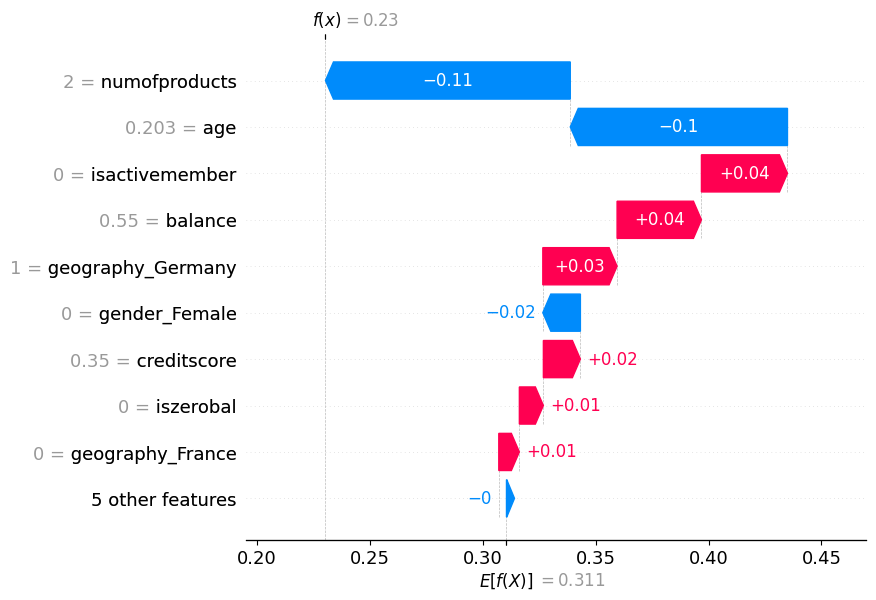

In [72]:
shap.plots.waterfall(shap_values[0])

In [73]:
# sample the test data

test_data_sample = X_test.sample(n=500)

In [74]:
test_data_sample.shape

(500, 14)

In [75]:
# calculate the shap values for test data sample

shap_values = explainer(test_data_sample)

PermutationExplainer explainer: 501it [05:29,  1.48it/s]                         


## Global Plots

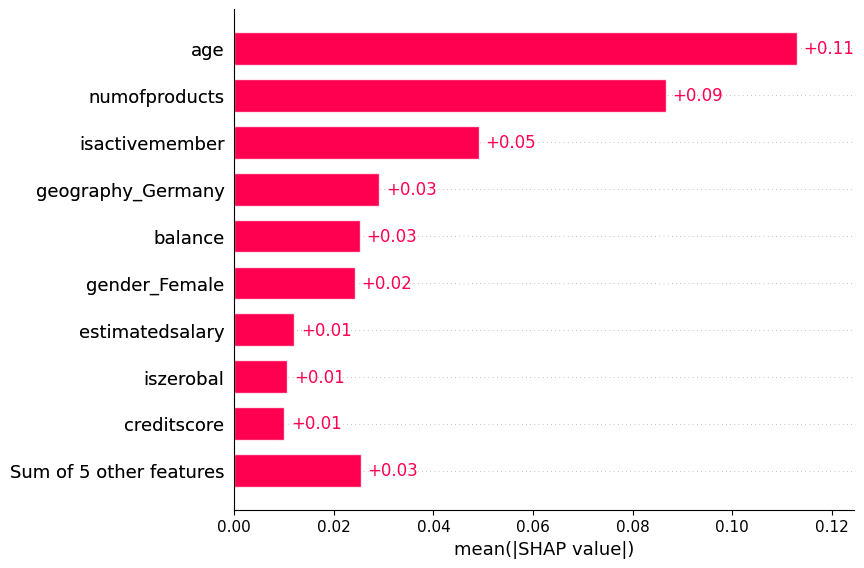

In [76]:
# bar plot

shap.plots.bar(shap_values)

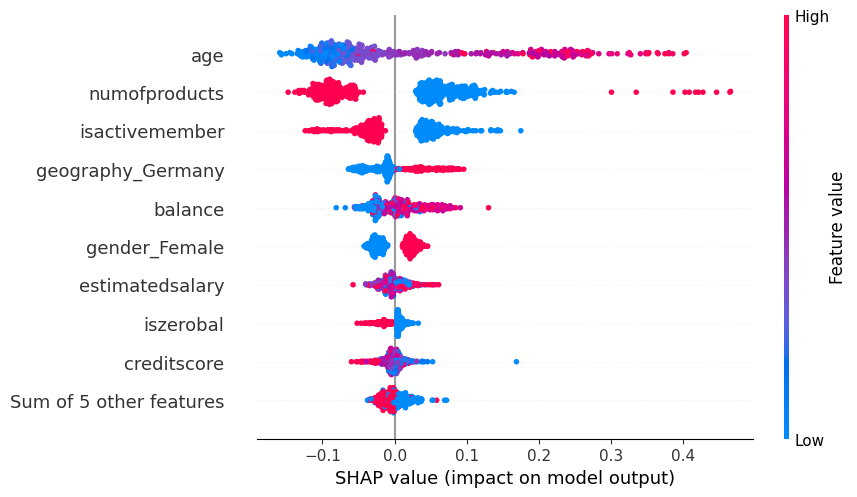

In [77]:
# suummary plot

shap.plots.beeswarm(shap_values)

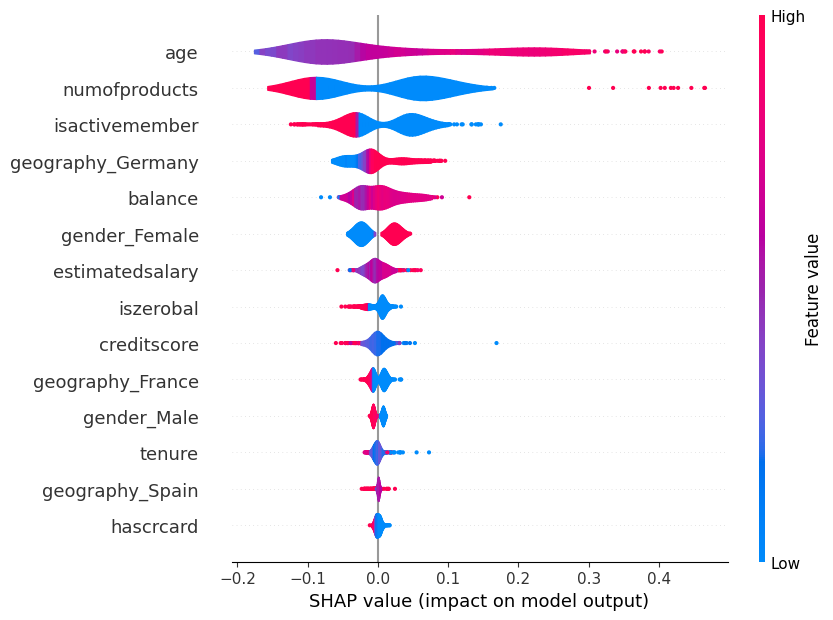

In [78]:
# violin plot

shap.plots.violin(shap_values)

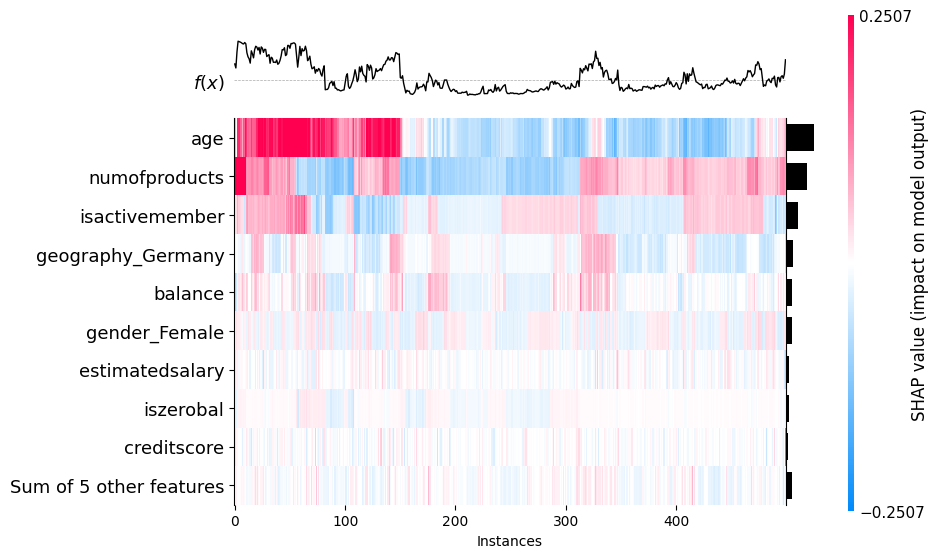

<Axes: xlabel='Instances'>

In [79]:
shap.plots.heatmap(shap_values)

## Local Plots

In [80]:
test_case = X_test[y_test == 1].sample(1)

In [82]:
row_shap_values = explainer(test_case)[0]

In [83]:
row_shap_values.shape

(14,)

In [84]:
df.loc[test_case.index]

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
9215,584,Germany,Female,37,10,134171.8,4,1,1,70927.11,1


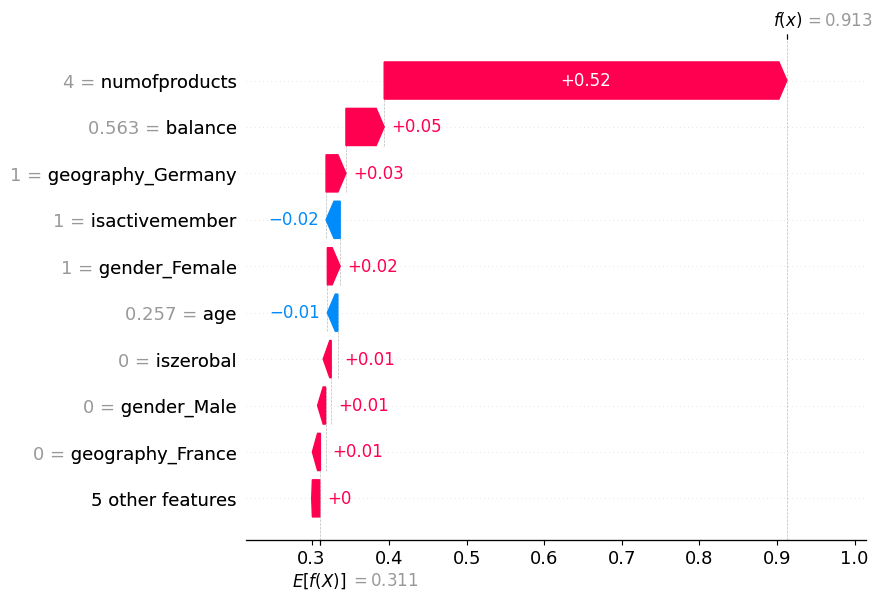

In [85]:
# waterfall plot

shap.plots.waterfall(row_shap_values)

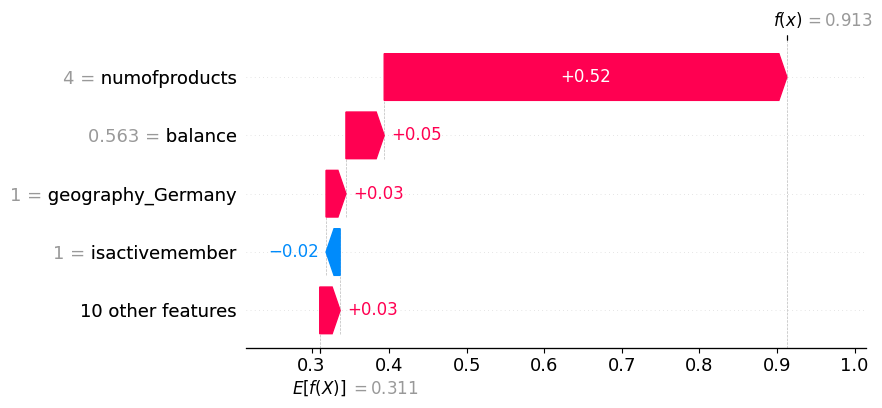

In [86]:
# waterfall plot

shap.plots.waterfall(row_shap_values,max_display=5)

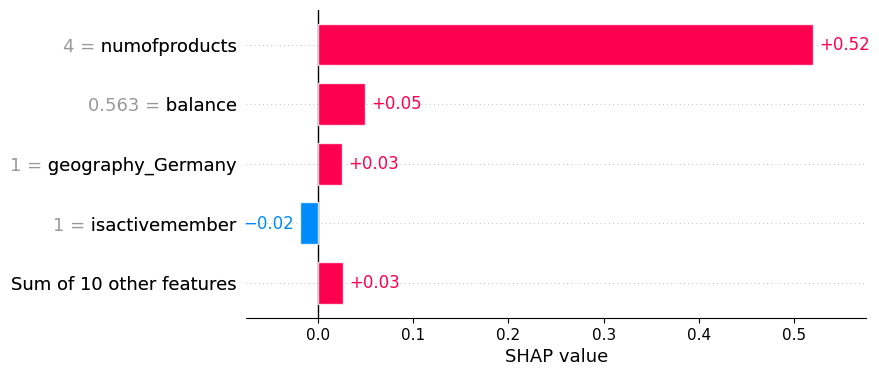

In [88]:
shap.plots.bar(row_shap_values,max_display=5)

In [90]:
# row force plot

shap.initjs()

shap.plots.force(row_shap_values)

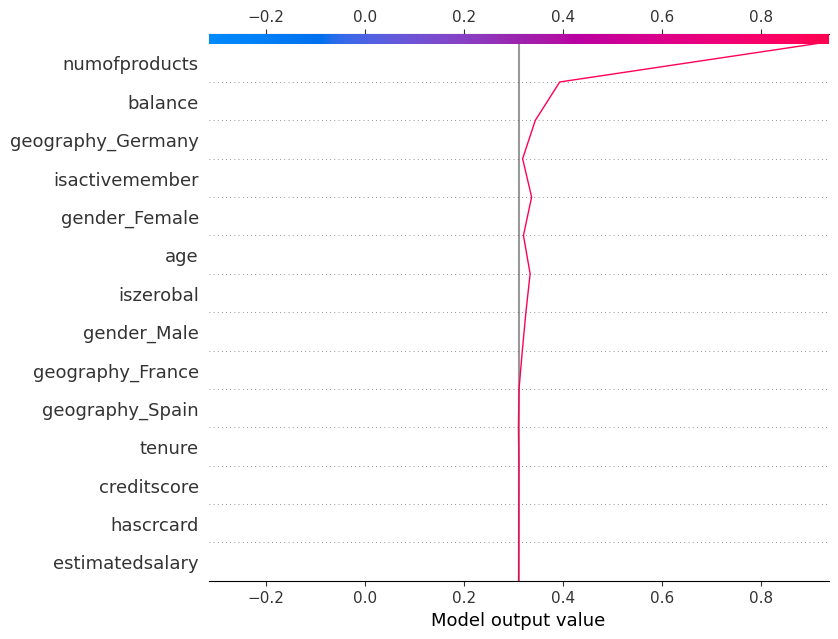

In [92]:
# decision plot

shap.plots.decision(shap_values=row_shap_values.values,base_value=row_shap_values.base_values,feature_names=X_test.columns.tolist())

## Batch Plot data

In [99]:
sample_batch_data = X_test.sample(3)

batch_shap_values = explainer(sample_batch_data)

In [100]:
batch_shap_values.shape

(3, 14)

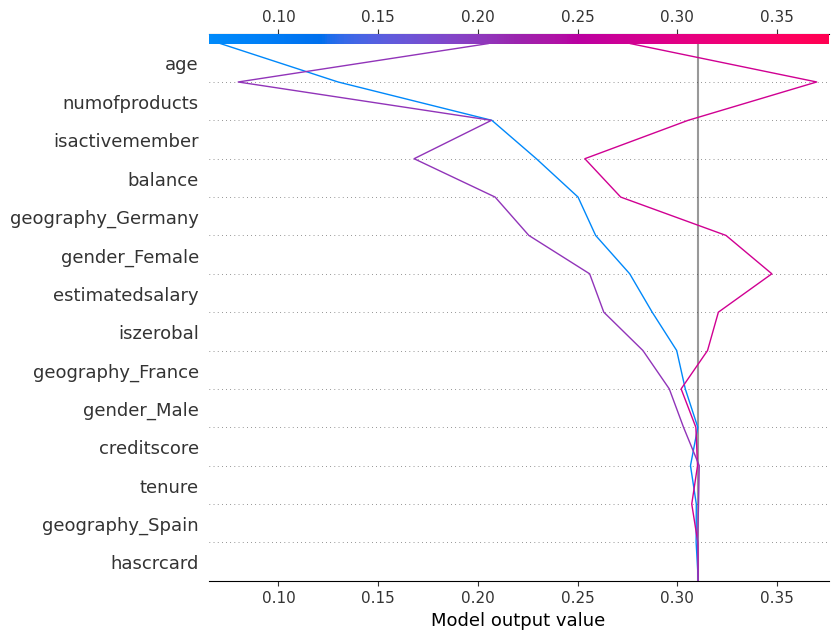

In [101]:
shap.plots.decision(shap_values=batch_shap_values.values,base_value=batch_shap_values.base_values[0],feature_names=X_test.columns.tolist())